<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 1, semester 2</center>
<center>Author: Aline Lefebvre-Lepot</center>

# Polynomial approximation of functions in one variable

&nbsp;

<table>
        <tr>
            <td><img src="./figures/Interpolation.png" alt="Interpolation" style="height: 300px;"/></td>
            <td><img src="./figures/LeastSquares.png" alt="LeastSquares" style="height: 290px;"/></td>
        </tr>
</table>

&nbsp;

<div markdown=1 class=Abstract> In this chapter we consider the problem of approximating a data set or a function using polynomials. First, we present and analyse interpolation methods: Lagrange interpolation and piecewise polynomial approximations. Then, we describe the least squares approximation, providing a "best fit" polynomial. These methods are used to solve three problems.

## Table of contents

- [Introduction](#intro)
- [Lagrange interpolation of functions](#Lagrange)
- [Piecewise Interpolation](#PiecewiseInterp)
- [Least square approximation](#LeastSquare)

In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

Suppose that a data set $(x_k,y_k)_{k=0..n}$ is given and one wants to model it using a simple function. Since one of the most useful and simple functions mapping $\mathbb{R}$ into itself is the set of polynomials, one searches for a polynomial $P$.

There is two ways of modeling the data:
- using interpolation methods: find $P$ such that for all $k=0\ldots n$, $P(x_k)=y_k$
- using approximation methods: find $P$ such that for all $k=0\ldots n$, $P(x_k)$ is "close to" $y_k$

We give below three examples of situations where polynomial approximation can be used.


### Case study 1: A model to estimate world population

The world population has been estimated for several years: we have available the following data (source http://www.worldometers.info/world-population/world-population-by-year/)

| Year | Pop. | Year | Pop. |
| --- | --- |
| 1900 | 1,600,000,000 | 1985 | 4,873,781,796 |
| 1927 | 2,000,000,000 | 1990 | 5,330,943,460 |
| 1955 | 2,772,242,535 | 1995 | 5,751,475,416 |
| 1960 | 3,033,212,527 | 2000 | 6,145,006,989 |
| 1965 | 3,339,592,688 | 2005 | 6,542,159,383 |
| 1970 | 3,700,577,650 | 2010 | 6,958,169,159 |
| 1975 | 4,079,087,198 | 2015 | 7,383,008,820 |
| 1980 | 4,458,411,524 | 2018 | 7,632,819,325 |

Suppose one wants to 
- Determine the population in 1951
- Determine the approximate time at which the number of living humans went past the $2.2$ Billions mark

To do so, one can model the evolution of the population versus time as a polynomial and use this polynomial to approximate the answer to these two questions.
 

### Case study 2: approximation of $\pi$

Suppose you want to approximate the value of $\pi$. Several methods can be used to do that. One possibility is to write $\pi$ as an integral and then to approximate the function to be integrated by simpler functions as polynomials which are easier to integrate. 

We know that $$\pi=4\int_{0}^{1}\frac{1}{1+x^2}dx $$

We set 

$$ d_{atan}:
\left\{\begin{array}{l}
                           \mathbb{R} &\rightarrow &\mathbb{R} \\
                            x &\rightarrow &\frac{1}{1+x^2}
                            \end{array}\right.
$$

so that 

$$\pi=4\int_{0}^{1}d_{atan}(x)dx $$

One now wants to approximate $d_{atan}$ using polynomials and integrate this approximation, which should give an approximation of $\pi$.

### Case study 3: parameter estimation for the Capital Asset Pricing Model (CAPM)

Consider a portfolio of assets: think for example to the CAC40 in France (benchmark French stock market index) or to the NASDAC or Dow Jones in USA. In this portfolio, consider a specific asset (i.e. one of the companies in the portfolio). 

We denote by $P_k$ its value (price) on day $k$. The return $R_k$ of the asset at day $k$ can be defined as a measure of what you gain (or lose) that day if you possess this asset:

$$
R_k = \log(P_k) - \log(P_{k-1})
$$

Let us denote $R^m_k$ the market portfolio return on day $k$ which again is a measure of what you gain (or lose) that day if you possess the whole portfolio.

The Capital Asset Pricing Model (CAPM) provides a theoretical relation to estimate returns on a specific asset and the whole market portfolio return through the equation

$$
R_k = \alpha + \beta \, R^m_k.
$$

The parameter $\beta$ represents the systematic risk (associated to the market): when the market portfolio return moves by 1 the asset's return variation is $\beta$. The higher $\beta$, the more the corresponding asset varies when the market varies, that is, the more risky the asset. 

The parameter $\alpha$ represents the risk associated to the asset, that is the return of the asset if the market does not change.

**Parameter estimation:**
Being given the values of $(R^m_k)_{k=1..n}$ and $(R_k)_{k=1..n}$ for $n$ days, one wants to estimate the parameters $\alpha$ and $\beta$ in order to model the behaviour of the corresponding asset, understand how risky it is and estimate its future trend.

To do so, one has to approximate the data by a polynomial of degree 1: $R_k = P(R_k^m)$ where $P(x)=\alpha + \beta\,x$. The question is to find "good" values $\alpha^*$ and $\beta^*$ for the parameters $\alpha$ and $\beta$ so that the approximated affine model is close to the data.

Once $\alpha^*$ and $\beta^*$ are computed, one also wish to know how confident they can be using this value to model the behaviour of the asset.


<a id="Lagrange"></a>
## Lagrange interpolation

<img src="figures/Lagrange.jpg" alt="Lagrange" style="width: 150px;" />

>**Joseph-Louis Lagrange (1736 - 1813).**
> Joseph-Louis Lagrange is an italian mathematician and astronomer. He made significant contribution in analysis, number theory and both classical and celestial mechanics. He is one of the creators of the calculus of variations, which is a field of mathematical analysis that uses variations, which are small changes in functions and functionals, to find maxima and minima of functionals. He is best known for his contributions to mechanics (initiating a branch now called Lagragian mechanics), presenting the "mechanical principles" as a result of calculus of variations. Concerning calculus, he contributed to discover the importance of Taylor series (now called Taylor-Lagrange series) and published in 1795 an interpolation method based on polynomials now called "Lagrange polynomials". Note that this interpolation method was already suggested in works of Edward Waring in 1779 and was a consequence of a formula published in 1783 by Leonhard Euler.

### Existence and uniqueness of the Lagrange polynomial

First, suppose you have data set of $n+1$ data points $(x_k,y_k)_{0\leq k\leq n}$ and you want to compute a polynomial $P$ with degree lower than $n$ fitting the data, that is: such that $P(x_k)=y_k$. 

<div  markdown=1 class="Ex">
- **Example 1.** Suppose $n=0$. Then, the constant polynomial 
$$P_0(x)=y_0$$
is the unique polynomial of degree at most $n$ fitting the data.
- **Example 2.** Suppose $n=1$. The data set contains 2 points: $(x_0,y_0)$ and $(x_1,y_1)$. The unique polynomial fitting these data with degree lower than $1$ is the straight line
$$
P_1(x) = y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0}.
$$
- **Example 3.** Suppose now $n=2$ and you want to fit the three points $(x_k,y_k)_{k=0\ldots 2}$ with a parabola (that is polynomial with degree lower than $2$). First, remarking that $P_2$ has to fit the first two points we write
$$
P_2(x)=y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0} + Q_2(x).
$$
Then, $Q_2$ has to verify $Q_2(x_0)=0$, $Q_2(x_1)=0$ and $Q_2(x_2)=y_2$. The first two conditions impose the existance of a constant $a$ such that $Q_2(x)=a(x-x_0)(x-x_1)$. The constant $a$ is fixed by the third condition which proves the uniqueness of the parabola fitting the data.

One can prove that for any data set of $n+1$ disjoint data points, there exists a unique polynomial of degree at most $n$ fitting the data:

<div  markdown=1 class="Thm">  Let $x_0, x_1, \cdots, x_n \in [a,b]$ a set of $n+1$ **interpolation points (the nodes)** with distinct nodes $x_k$, and $y_0,y_1,\cdots,y_n$ a set of arbitrary **real numbers**. There exists a unique real polynomial $P_n$ of degree at most $n$ such that, $P_n(x_i) = y_i$ for all $0 \leq i \leq n.$ This polynomial is explicitly given by 

$$P_n(x) = \sum_{i=0}^n y_i L_i(x)$$

where $(L_i)_i$ are the elementary *Lagrange interpolation* polynomials given by 

$$ L_i(x) = \prod_{j \neq i}\frac{x - x_j}{x_i - x_j}, \quad 0 \leq i \leq n$$

> **Proof.** The formula proposed for $P_n$ satifies the desired properties, which proves the existence. To prove uniqueness, suppose that there exist two polynomials $P_n$ and $Q_n$ solution to the problem. Then, the polynomial $P_n-Q_n$ is of degree lower than $n$ and has at least $n+1$ roots ($x_0\ldots x_n$). Thus,  $P_n-Q_n$ is the null polynomial and $P_n$ is identical to $Q_n$.

<div  markdown=1 class="Rmk"> The theorem can also be proved using linear algebra. Indeed, $P_n$ can be written as 

$$
P_n(x) = a_0 + a_1 x + a_2 x^2 + \ldots +a_n x^n
$$

$\mathbf{a}=(a_i)_{i=0\ldots n}$ being $n+1$ constants to be found. For $k=0\ldots n$ we write the $n+1$ conditions $P(x_k)=y_k$:

$$
a_0 + a_1 x_k + a_2 x_k^2 + \ldots +a_n x_k^n = y_k\quad \text{for} \quad k=0\ldots n
$$

which is a linear system to be solved for $\mathbf{a}$. The problem can be written in a matrix form:

$$
V_n\, \mathbf{a}=\mathbf{y}\quad \text{where}\quad V_n=\left(\begin{array}{ccccc} 1 & x_0 & x_0^2 & \ldots & x_0^n \\ 1 & x_1 & x_1^2 & \ldots & x_1^n \\ \vdots & & & &\vdots \\ 1 & x_n & x_n^2 & \ldots & x_n^n \end{array}\right)
$$

The corresponding matrix is the well-known Vandermonde matrix which is invertible, provided the $(x_k)_k$ are distincts. This proves the uniqueness of $\mathbf{a}$ and then of $P_n$.

### Computation of the Lagrange polynomial

If one wants to use the Vandermonde matrix to compute the coefficients of the Lagrange polynomial, one needs to perform the inversion of a $n\times n$ matrix. This requires $O(n^3)$ operations. The next method we will study only requires $O(n^2)$ operations to compute the coefficients.

<div  markdown=1 class="Def"> **Divided differences**

Let $(x_i,y_i)_{0 \leq i \leq N}$ a family of points. The divided differences are defined by the following recursive formula: 

\begin{align}
\delta^0y[x_i] &= y_i \\
\delta^1y[x_i,x_{i+1}] &= \frac{\delta^0y[x_{i+1}] - \delta^0y[x_i]}{x_{i+1} - x_i} \\
\delta^2y[x_i,x_{i+1},x_{i+2}] &= \frac{\delta^1y[x_{i+1},x_{i+2}] - \delta^1y[x_i,x_{i+1}]}{x_{i+2} - x_i} \\
\delta^ky[x_i,\cdots,x_{i+k}] &= \frac{\delta^{k-1}y[x_{i+1},\cdots,x_{i+k}] - \delta^{k-1}y[x_i,\cdots,x_{i+k-1}] }{x_{i+k} - x_i}
\end{align}

<div  markdown=1 class="Thm"> The Lagrange polynomial associated to the $n+1$ nodes $(x_k)_{k=0..n}$ and reals $(y_k)_{k=0..n}$ is given by 

$$P_n(x) = \delta^0y[x_0] + (x-x_0)\delta^1y[x_0,x_1] + (x-x_0)(x-x_1)\delta^2y[x_0,x_1,x_2] + \cdots + \\(x-x_0)(x-x_1)\cdots(x-x_{n-1})\delta^{n}y[x_0,\cdots,x_n].$$

> **Proof.** For $n=0$, the result is obvious. Let us assume that the result is true for $n-1$, let's show that it also holds for $n$. Let $P_n$ the Lagrange polynomial associated to $(x_k,y_k)_{0 \leq k \leq n}$ (remember $P_n$ is of degree at most $n$). Consider the Lagrange polynomials $P_{n-1}$ and $Q_{n-1}$ associated respectively to $(x_k,y_k)_{0 \leq k \leq n-1}$ and $(x_k,y_k)_{1 \leq k \leq n}$. Let $R_n$ and $S_n$ be the two polynomials of degree at most $n$ such that 
>
>$$P_{n}(x) = P_{n-1}(x) + R_n(x) = Q_{n-1}(x) + S_n(x).$$
>
> By definition of the Lagrange polynomials, we see that $R_n(x) = P_{n+1}(x) - P_n(x)$ vanishes at $x = x_0, \cdots, x_{n-1}$, thus, since $R_n$ is of degree at most $n$, there exists a constant $a_R$ such that 
>
>$$R_n(x) = a_R(x-x_0)\cdots (x-x_{n-1}).$$
>
> Similarly, there exists a constant $a_S$ such that 
>
>$$S_n(x) = a_S(x-x_1)\cdots (x-x_{n}).$$
> 
> Now, observe that $R_n - S_n = Q_{n-1} - P_{n-1}$. The remainder of the proof just consists in identifying the coefficients of order $n$ and $n-1$ of these two polynomials. The right-hand side is of degree at most $n-1$ which implies that $S_n$ and $R_n$ must have the same coefficient of order $n$, that is 
>
> $$a_R = a_S,$$
> 
> which we now call $a$. We can thus write 
>
>$$R_n(x) - S_n(x) = a(x-x_1)\cdots(x-x_{n-1}) \left[(x - x_0) - (x-x_n)\right].$$
> 
> Matching the coefficient of order $n-1$ of $R_n - S_n$ with that of $Q_{n-1} - P_{n-1}$ now yields, according to the reccurence hypothesis:
>
>$$a(x_n - x_0) = \delta^{n-1}y[x_1,\cdots,x_n] - \delta^{n-1}y[x_0,\cdots,x_{n-1}].$$
> 
> Therefore $a = \delta^{n}y[x_0,\cdots,x_n]$ and using $P_n = P_{n-1} + R_n$, we get 
> 
> $$ P_n(x) =  \delta^0y[x_0] + (x-x_0)\delta^1y[x_0,x_1] + (x-x_0)(x-x_1)\delta^2y[x_0,x_1,x_2] + \cdots + \\(x-x_0)(x-x_1)\cdots(x-x_{n-1})\delta^{n}y[x_0,\cdots,x_n]$$
>
> as intended.

Using this formula, we can use a Hörner scheme to evaluate the Lagrange polynomial, by rewriting: 

$$\begin{eqnarray} 
P(x) &=& \delta^0y[x_0] \\
&& + (x-x_0) \bigg( \delta^1y[x_0,x_1]\\
&& + (x-x_1) \Big(\delta^2y[x_0,x_1,x_2]\\
&& + \cdots\\
&& + (x-x_{n-1})  \delta^ny[x_0,\cdots,x_n]\Big)\bigg)\end{eqnarray}$$

that allows to compute the value of $P$ at $x$ in $O(n)$ operations.

Examples of computation of Lagrange polynomials are proposed below. Using the divided difference method together with the Hörner scheme, this leads to $O(n^2)$ operations to compute the coefficients to the Lagrange polynomial plus $O(n)$ operations to evaluate it. 

First, we implement the function computing the values of a given polynomial using the *Hörner-like* scheme:

$$
P(x)= a_0 + (x-x_0)\,\times\, \bigg(a_1 \,+\, (x-x_1)\,\times\, \Big(a_2\, +\, \ldots\, +\,(x-x_{n-1})\,a_{n}\Big) \bigg)
$$

In [2]:
## Horner algorithm to evaluate a polynomial
## P(x) = a0 + a1 (x-x0) + a2 (x-x0)(x-x1) + ... + an (x-x0)...(x-xn)
## input : a = vector containing the coefficients a0...an
##         x = vector containing the points x0...xn
##         X = vector (or real) containing the points x on which the polynomial has to be evaluated
## output : R = vector containing the values of the polynomial at points X_i
##              R[i] = P(X[i])

def eval_Horner(a,x,X):
    N = a.size
    R = a[-1]
    for k in range(1,N):
        R = R * (X - x[-k])
        R = R + a[-1-k]
    return R

To compute the coefficients $(\delta^ky[x_0,\cdots,x_k])_{k=0..n}$ of Lagrange polynomial, we introduce an intermediate vector $\delta^k$ that will be computed step by step: 

$$\delta^k = (\delta^0y[x_0],\delta^1y[x_0,x_1],\delta^2y[x_0,x_1,x_2],\cdots,\delta^ky[x_0,\cdots,x_k],\delta^ky[x_1,\cdots,x_{k+1}],\dots,\delta^ky[x_{n-k},\cdots,x_n])$$

The first $k+1$ coefficients of $\delta^k$ contain the first $k+1$ coefficients of $P_n$ so that $\delta^n$ is the list of all the coefficients of the polynomial. 

From the definition of the divided differences, these vectors $\delta^k$ can be computed recursively. Indeed, we see that $\delta^0 = y$ and that $\delta^{k+1}$ can be computed from $\delta^k$ from

$$
\begin{eqnarray}
\forall i \leq k,  \quad\delta^{k+1}[i] &=& \delta^k[i], \\
\forall i>k,  \quad \delta^{k+1}[i] &=& \delta^{k+1}y[x_{i-k-1},\cdots,x_i] \\
&=& \frac{\delta^{k}y[x_{i-k},\cdots,x_i] - \delta^k y[x_{i-k-1},\cdots,x_{i-1}]}{x[i] - x[i - k - 1]} \\
&=& \frac{\delta^k[i] - \delta^k[i-1]}{x[i] - x[i-k-1]}
\end{eqnarray}
$$

For a given set of data $(x_k,y_k)_{k=0..n}$, the code below computes recursively the vectors $\delta^k$ and returns the last computed vector $\delta^n$ containing the coefficients of $P_n$.

In [3]:
## Computation of the coefficients of the Lagrange interpolation polynomial 
## using the divided differences method 
## for the dataset (xk,yk)_{k=0..n}
## input : x = vector containing the nodes x0...xn
##         y = vector containing the values y0...yn
## output : deltak = vector containing the coefficients of the Lagrange polynomial:
##                   deltak[i] = di
##                   where Pn(x) = d0 + d1 (x-x0) + d2 (x-x0)(x-x1) + ... + dn (x-x0)...(x-xn)

def divided_diff(x, y):
    n = x.size
    deltak = y.copy() # Use copy to prevent the values in y from being modified 
    for k in range(1,n):
        deltak[k:] = (deltak[k:] - deltak[k-1:-1])/(x[k:] - x[:-k])
    return deltak

We now define the function computing the values on a given set of $N$ points $(X_i)_{i=0..N-1}$ of the Lagrange polynomial for the dataset $(x_k,y_k)_{k=0..n}$ .

In [4]:
## Computation of the values of the Lagrange interpolation polynomial on a given set of points
## The Lagrange polinomial being based on the dataset (xk,yk)_{k=0..n}
## input : x = vector containing the nodes x0...xn
##         y = vector containing the values y0...yn
##         X = vector (or real) containing the points x on which the polynomial has to be evaluated
## output : R = vector containing the values of the polynomial at points X_i
##              R[i] = P(X[i])
##          delta = vector containing the coefficients of the Lagrange polynomial:
##                  deltak[i] = di
##                  where Pn(x) = d0 + d1 (x-x0) + d2 (x-x0)(x-x1) + ... + dn (x-x0)...(x-xn)

def LagrangeInterp(x, y, X):
    delta = divided_diff(x, y)    # computation of the coefficients of Lagrange polynomial for datas (x,y)
    R = eval_Horner(delta, x[:-1], X)  # evaluation at points X
    return (R, delta)

We can now test this function for different datasets.

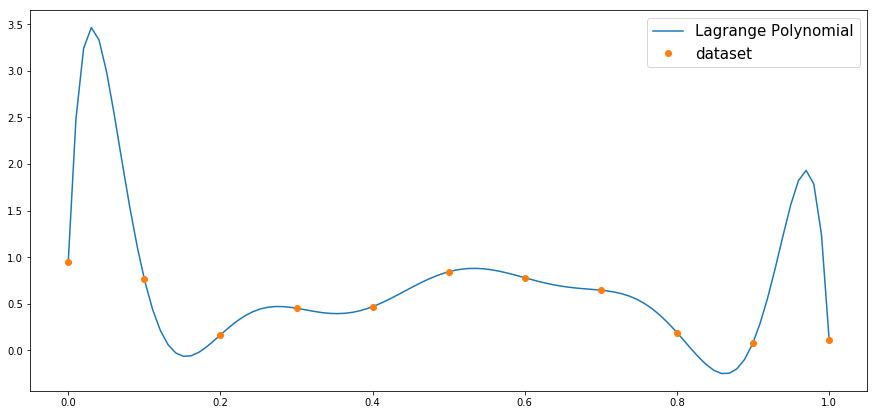

In [5]:
n = 10   # degree of the interpolation polynimial
x = np.linspace(0,1,n+1)   # n+1 equispaced nodes (x_k)
y = np.random.random_sample((n+1,))  # n+1 random values for (y_k), uniform in [0,1]
X = np.linspace(0,1,10*n)  # values of x where the lagrange polynomial has to be computed

# computes the values of the polynomial at point X and its coefficients
PX, delta = LagrangeInterp(x, y, X)  

# plot
fig = plt.figure(figsize = (15,7))
plt.plot(X,PX,label="Lagrange Polynomial")
plt.plot(x,y,marker='o',linestyle='',label="dataset")
plt.legend(fontsize = 15)
plt.show()

### Approximating a function: estimation of the error

In the previous section, we presented the way to compute the polynomial with lower degree interpolating a dataset $(x_k,y_k)_{k=0..n-1}$. 

Suppose now that, for all $k$, the value $y_k$ is the value of a given function $f$ at the node $x_k$: $y_k=f(x_k)$. 

Denote by $P_n$ the Lagrange polynomial interpolating the dataset $(x_k,y_k)$. The question is to know if  $P_n$ is a good approximation of $f$. More precisely one has to answer the following questions:
- if $P_n$ is used to approximate $f$ for other points than the nodes $x_k$, how confident can we be in the results ?
- does it improve when the number of nodes goes to infinity (i.e. $n$ goes to infinity) ?
- are there particularly good choices for the nodes  $(x_k)$?

For example, suppose you want to approximate $f(x)=\sin(2\pi x)$ on $[-1,1]$ using Lagrange polynomials. If $\overline P_n$ in the Lagrange polynomial computed from $n+1$ equidistant nodes in $[-1,1]$:

$$
\overline x_k = -1 + \frac{2k}{n+1}, \quad 0\leq k \leq n+1
$$

we plot below the interpolant for different values of $n$ and the corresponding local error: 

$$
e_n(x) = \lvert f(x)-\overline P_n(x) \rvert.
$$

In [6]:
## function ploting the Lagrange interpolant and the local error on [-1,1]
## input : f = function to be interpolated
##         x = vector containing the nodes x0...xn on which the interpolation is based
## output : plots 2 figures
##         left figure: f and its interpolant
##         right figure: the local error e_n(x)

def showLagrange(f, x):
    X = np.linspace(-1,1,100)  # points to plot the interpolent and the error
    X = np.sort(np.concatenate((X, x)))     # add the nodes to the plot  
    y = f(x)   # values of f at the nodes
    (PX, delta) = LagrangeInterp(x, y, X)    
    fig = plt.figure(figsize=(20, 7))
    plt.subplot(121)
    plt.plot(X,f(X),label = 'Target function')
    plt.plot(x,f(x),marker='o',linestyle='',label = 'data set')
    plt.plot(X,PX,'--',label='Lagrange polynomial')
    plt.legend(fontsize = 15)
    plt.title('Lagrange Polynomial vs '+f.__name__,fontsize = 15)
    plt.subplot(122)
    plt.plot(X,abs(f(X) - PX))
    plt.plot(x,1e-16*np.ones(x.size),marker='o',linestyle='')
    plt.yscale('log')
    plt.title('Interpolation error in log-scale for '+f.__name__+' function',fontsize = 15)
    plt.show()

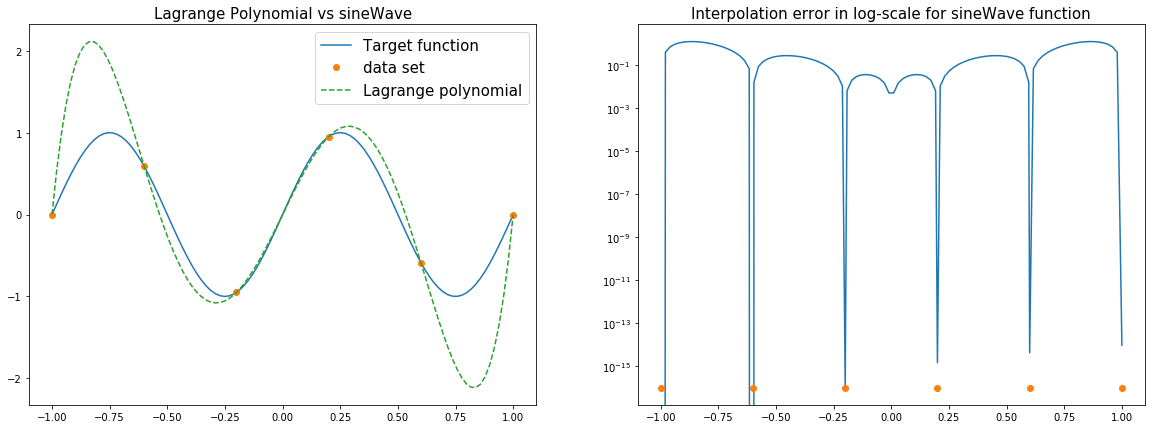

In [7]:
## test for the sine function and equidistant points

def sineWave(x):
    return np.sin(2*pi*x)

n=5
x=np.linspace(-1,1,n+1)  # n+1 equispaced nodes for the interpolation
showLagrange(sineWave,x)  


If $f$ is the function to be interpolated, $(x_k)_{0 \leq k \leq n}$ are any distinct interpolation points and $P_n$ is the corresponding Lagrange polynomial, we can quantify the quality of the approximation  by studying the **uniform error on [a,b]**:

$$\sup_{[a,b]}\,\lvert f(x) - P_n(x) \rvert.$$

If this quantity is equal to zero then $f$ and $P_n$ are equal on $[a,b]$. Moreover, $\varepsilon$ being given, if the uniform error is smaller than $\varepsilon$, then for any $x$ in $[a,b]$, the absolute difference between $f(x)$ and $P_n(x)$ is lower than $\epsilon$. In other "words": 

$$\sup_{[a,b]}\,\lvert f(x) - P_n(x) \rvert < \varepsilon \implies \forall  x \in [a,b], \quad \lvert f(x) - P_n(x)\rvert < \varepsilon$$

In the following, we study the behaviour of the uniform error when the number of points goes to infinity.

<div  markdown=1 class="Thm">  **Approximation error for the Lagrange polynomial** Let $f : [a,b] \to \mathbb{R}$ be $n+1$ times differentiable and let $P_n$ the Lagrange polynomial associated with the points $(x_i, f(x_i))_{0\leq i \leq n}$. Then, for every $x$ in $[a,b]$, there exists $\xi \in ]a,b[$ such that 

$$f(x) - P_n(x) = (x-x_0)(x-x_1)\cdots(x-x_n) \frac{f^{(n+1)}(\xi)}{(n+1)!}$$

> **Proof.** 
> If $x$ is equal to one of the nodes $x_k$, the equality holds. So let us prove it if $x\neq x_k$ for all $k=0\ldots n.$ 
>
>To do so, let $x$ be given and consider $P_{n+1}$ the Lagrange interpolation polynomial of $f$, of degree lower than $n+1$ and based on the $n+2$ nodes $(x,x_0,x_1,\ldots ,x_n)$.
>
> Since $P_{n+1}$ interpolates $f$ at point $x$, wa have:
>
>$$
f(x)-P_n(x) = P_{n+1}(x)-P_n(x).
$$
>
>Then, remark that the $n+1$ points $(x_0,\ldots,x_n)$ are roots the polynomial $P_{n+1}-P_n$, of degree lower than $n+1$. As a consequence, we know that there exists a constant $C$ such that
>
>$$
P_{n+1}(t)-P_n(t) = C \,(t-x_0)(t-x_1)\cdots(t-x_n)\quad \forall t\in[a,b]
$$
>
>and consequently we get if $t=x$:
>
>$$
P_{n+1}(x)-P_n(x) = C \,(x-x_0)(x-x_1)\cdots(x-x_n).
$$
>
>It remains to compute the constant $C$. To do so, let us consider the function
>
>$$
g(t) = P_{n+1}(t) - f(t).
$$
>
>This function has $n+2$ disctincts roots (being $x$, $x_0$, ... $x_n$) and then, iterating Rolle's theorem we obtain that
>
>$$
\exists \xi \in[a,b], \quad g^{(n+1)}(\xi)=0.
$$
>
>Using the fact that $P_{n+1}=P_n +C \,(x-x_0)(x-x_1)\cdots(x-x_n)$ together with the fact that degree of $P_n$ is lower than $n$,  we obtain
>
>$$
0=g^{(n+1)}(\xi)= P_{n+1}^{(n+1)}(\xi) - f^{(n+1)}(\xi) = C\,(n+1)! - f^{(n+1)}(\xi)
$$
>
>and finally
>
>$$
C = \frac{f^{(n+1)}(\xi)}{(n+1)!}
$$
>
>which ends the proof.


Let us define the polynomial $\Pi_{n+1}$ of degree $n+1$ as

$$
\Pi_{n+1}(x) = (x-x_0)(x-x_1)\cdots(x-x_n).
$$

From the previous theorem we see that the convergence to zero of the uniform error, depends both on 
- the successive derivatives of $f$
- the estimation of 
$$
\Delta(x_0,\ldots,x_n) = \sup_{x\in [a,b]}\lvert \Pi_{n+1}(x) \rvert = \sup_{x\in [a,b]}\lvert (x-x_0)(x-x_1)\cdots(x-x_n) \rvert
$$

which itself depends on the nodes that have been used for the interpolation. 

In the case of a very regular function, one can deduce the convergence of the interpolants when the number of nodes goes to infinity, whatever the way the nodes are chosen:

<div  markdown=1 class="Thm">  **Uniform convergence for "regular" functions** Let $f : [a,b] \to \mathbb{R}$ be $\cal{C}^\infty$. Suppose that 

$$
\exists M>0, \quad \forall k\geq 0,\quad \sup_{[a,b]} \lvert f^{(k)}\rvert \leq M.
$$

For any $n\in\mathbb{N}$, choose a family of $n+1$ nodes $({x_k}^n)_{0\leq k \leq n}$ in $[a,b]$ and let $P_n$ be the Lagrange polynomial interpolating $f$ at these nodes. Then, the sequence $P_n$ converges uniformly to $f$ on the interval $[a,b]$:

$$\sup_{x\in[a,b]}\,\lvert f(x) - P_n(x) \rvert \longrightarrow 0 \quad\text{when}\quad n\to +\infty.$$

We say that the sequence $(P_n)_{n\geq 0}$ *converges uniformly* to $f$ when $n$ goes to infinity.

> **Proof.** From the previous theorem we have 
>
>$$
\lvert f(x) - P_n(x) \rvert \leq \frac{M}{(n+1)!} \sup_{x\in [a,b]}\lvert (x-x_0)(x-x_1)\cdots(x-x_n) \rvert \leq \frac{M}{(n+1)!} (b-a)^n
$$
>
>which goes to zero when $n$ goes to infinity.

The hypothesis of the previous theorem hold for the sine function. From this, we can deduce that for example, the previous interpolants on equispaced nodes are **converging uniformly** to the function when the number of points goes to infinity. 



<div markdown = 1, class = "Def"> The function $f$ being given, we call $E_{\text{equi}}(n)$ the uniform error for equispaced nodes, that is: 

$$E_{\text{equi}}(n) = \sup_{[a,b]}\,\lvert f(x) - \overline P_n(x) \rvert$$

where $\overline P_n$ is the Lagrange polynomial approximating $f$ on $[a,b]$ for the  $n+1$ equispaced nodes $(\bar x_0,\ldots,\bar x_n)$.

We plot the behaviour of $E_{\text{equi}}$ versus $n$ in the case of the sine function. Note that, the $\sup$ on $[a,b]$ cannot be computed exaclty (it would require to evaluate $f$ and $P_n$ an infinity of times). We will approximate it as the $\max$ on a set of points $(X_i)_{i=0..N}$. That is, we make the approximation 

$$\sup_{[a,b]}\,\lvert f(x) - \overline P_n(x) \rvert \approx \max_{i \in [0,N]} \lvert f(X_i) - P_n(X_i)\rvert$$

Where $X_i$ is a set of equispaced spaced points on $[a,b]$ with $N$ big enough...

In [8]:
## function that computes the uniform error on [-1,1] 
## for a given set of values of n = 1..nmax and equidistant points
## input : f = function to be interpolated
##         nmax = maximal value of n
## output : ns = vector which contains the values of n tested: 
##               ns = 1 .. nmax
##          Eequi = vector which contains the corresponding values of the uniform error
##                  Eequi[n] = E_equi(n) = sup (f - \bar Pn) 

def ErrorEqui(f, nmax):
    ns = np.arange(1,nmax) # values of n to be tested
    Eequi = np.zeros(ns.size) # Pre-allocation
    Xtest = np.linspace(-1,1,200)  # points discretizing [a,b] to compute the uniform error
    for n in ns:
        # loop on n, for each n, compute the uniform error on [-1,1]
        x = np.linspace(-1,1,n+1) # n+1 equispaced nodes to compute the interpolant
        y = f(x)  # values of f at these nodes
        # computation of the values of the Lagrange polynomial at points X
        (PX, delta) = LagrangeInterp(x,y,X)
        # computation of the corresponding uniform error
        Eequi[n-1] = np.max(abs(PX - f(X)))
    return (ns, Eequi)

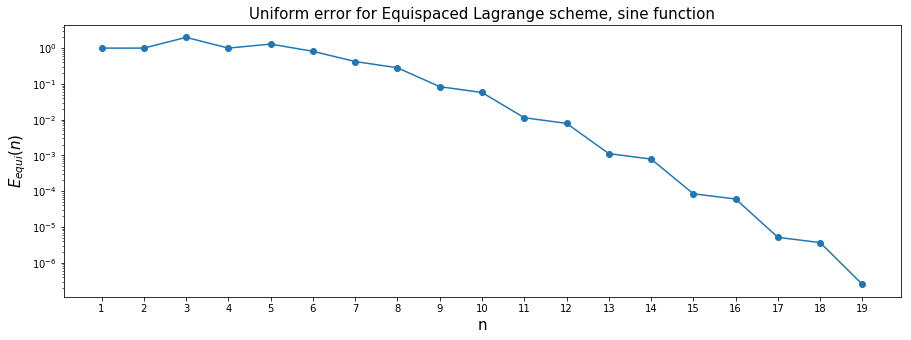

In [9]:
## test for the sine function 
nmax=20
(ns, Eequi) = ErrorEqui(sineWave, nmax)

fig = plt.figure(figsize = (15,5))
plt.semilogy(ns,Eequi,marker='o')
plt.title('Uniform error for Equispaced Lagrange scheme, sine function',fontsize = 15)
plt.ylabel('$E_{{equi}}(n)$',fontsize = 15)
plt.xlabel('n',fontsize = 15)
plt.xticks(ns)
plt.show()

This confirms the convergence to zero of the uniform error when $n$ goes to infinity.

### Approximating a function: Runge phenomenon

<img src="figures/Runge.jpg" alt="Runge" style="width: 150px;"/>
  
>**Carl David Tolmé Runge (1856-1927).**
> Carl David Tolmé Runge was a German mathematician, physicist, and spectroscopist. In the field of numerical analysis, he is the co-developper of the Runge-Kutta method to approximate the solution to differential equations. He discorvered the now called "Runge's phenomenon" in 1901 when exploring the behavior of errors when using polynomial interpolation to approximate certain functions. Runge's phenomenon is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points. The discovery was important because it shows that going to higher degrees does not always improve accuracy. The phenomenon is similar to the Gibbs phenomenon in Fourier series approximations.

As proved in the previous subsection, the approximation error depends on the behaviour of the successive derivatives of $f$. Let us consider the following function 

$$Runge(x) = \frac{1}{1+25x^2}$$

If we apply Lagrange interpolation on $[-1,1]$ to this function with 10 and 20 equispaced nodes, here is what we get:  

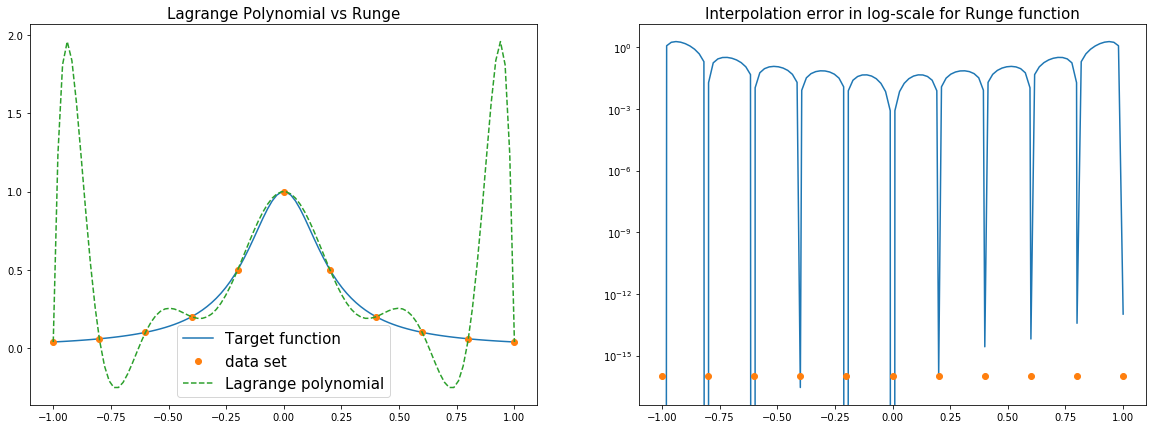

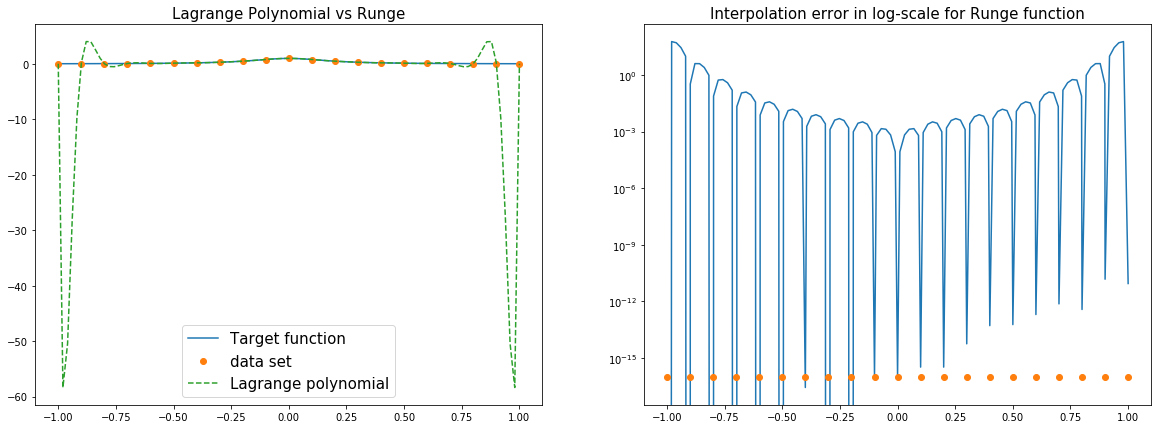

In [10]:
def Runge(x):
    return 1/(1+25*x**2)

n1 = 10; n2 = 20
x1 = np.linspace(-1,1,n1+1)
x2 = np.linspace(-1,1,n2+1)
showLagrange(Runge,x1)
showLagrange(Runge,x2)

We can see that high oscillations occur near the edges of the interval and do not seem to decrease as $n$ increases (all the contrary). If we plot for this function the values of the uniform error $E_{equi}(n)$ versus $n$ we obtain: 

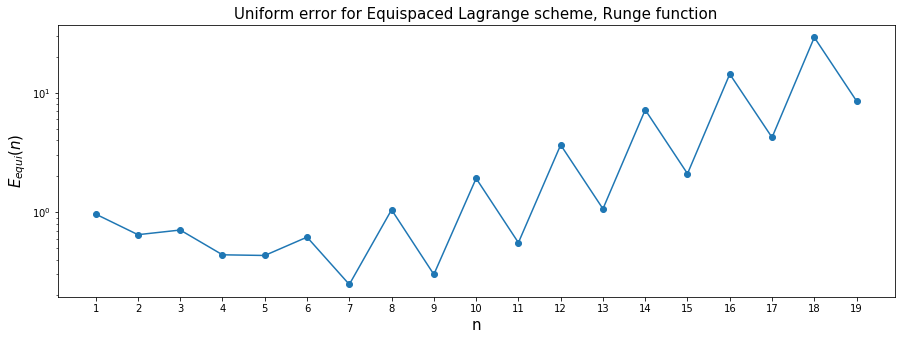

In [11]:
## test for the Runge function 
nmax=20
(ns, Eequi) = ErrorEqui(Runge, nmax)

fig = plt.figure(figsize = (15,5))
plt.semilogy(ns,Eequi,marker='o')
plt.title('Uniform error for Equispaced Lagrange scheme, Runge function',fontsize = 15)
plt.ylabel('$E_{equi}(n)$',fontsize = 15)
plt.xlabel('n',fontsize = 15)
plt.xticks(ns)
plt.show()

This confirms that, for the $Runge$ function, the Lagrange polynomials based on equispaced nodes do not converge uniformly towards the interpolated function. This is due to the fact that the successive derivatives of the functions increase too quickly with respect to the convergence to zero of the term $\Pi_{n+1}(x)/(n+1)!$ in the error approximation.

### Approximating a function: choice for the data points

<img src="figures/Chebyshev.jpg" alt="Chebyshev" style="width: 200px;"/>
  
>**Pafnuty Lvovich Chebyshev (1821-1894).**
>Pafnuty Lvovich Chebyshev is a Russian mathematician. He is known for his work in the fields of probability, statistics, mechanics, and number theory. He is also known fhr the "Chebyshev polynomials", which are a sequence of orthogonal polynomials. He introduced these polynomials to minimize the problem of Runge's phenomena in polynomial approximation of functions. These polynomials are also used in numerical integration and are solution to are special cases of the Sturm–Liouville differential equation that occur very commonly in mathematics, particularly when dealing with linear partial differential equations.


To enhance the quality of the approximation, one can look for better nodes $(x_k)_k$. Recalling the estimation: 

$$f(x) - P_n(x) = \Pi_{n+1}(x) \frac{f^{(n+1)}(\xi)}{(n+1)!}$$

one could choose the points $(x_0, x_1, \cdots, x_n)$ so as to minimize the quantity

$$
\Delta(x_0,\ldots,x_n) =\sup_{[a,b]}\lvert \Pi_{n+1}(x) \rvert =  \sup_{[a,b]}\lvert (x-x_0)(x-x_1)\cdots(x-x_n) \rvert
$$

It turns out that one choice of $n$ reals $(x_k)_k$  that achieves this minimum for [a,b] = [-1,1] is well-known, and is related to the Chebyshev polynomials that we will now introduce.

<div  markdown=1 class="Def"> The Chebyshev polynomial of order $n$ is noted $T_n$ and is defined by recurrence by $T_0(X) = 1$, $T_1(X) = X$ and for all $n$
$$T_{n+1}(X) = 2XT_n(X) - T_{n-1}(X).$$

The Chebyshev polynomials verify the following properties (see appendix): 

<div  markdown=1 class="Prop"> For all $n \in \mathbb{N}$, the polynomial $T_n$ has the following properties

- It is a polynomial of degree $n$ and if $n\geq 1$ the leading coefficient is $2^{n-1}$.

- For all $\theta \in \mathbb{R},$

$$ T_n(\cos\theta) = \cos(n\theta) $$

- $T_n$ has its $n$ (distincts) roots in $]-1,1[$ given by

$$\hat{x}_k = \cos\left(\frac{2k + 1}{2n}\pi\right), \quad 0 \leq k \leq n-1.$$

- $T_n(x) = 2^{n-1}(x-\hat{x}_0)\cdots(x-\hat{x}_{n-1})$

- For $x\in ]-1,1[$, one has $-1 \leq T_n(x) \leq 1$. If we let $\hat{y}_k = \cos\left(\frac{k\pi}{n}\right)$ for $0\leq k \leq n$, we have

$$-1= \hat{y}_n < \hat{y}_{n-1} < \cdots < \hat{y}_0 = 1 \quad \text{with} \quad T_n\left(\hat{y}_k\right) = (-1)^{k}$$

For a given value of $n$, let us denote again by $(\overline x_k)_{k=0..n}$ the $n+1$ equispaced points in $[-1,1]$ and let us compare on $[-1,1]$ the two following polynomials:


$$\overline \Pi_{n+1}(x) = (x- \overline x_0)(x-\overline x_1)\cdots(x-\overline x_n)$$

$$\hat \Pi_{n+1}(x) = \frac{T_{n+1}(x)}{2^{n}} = (x-\hat x_0)(x-\hat x_1)\cdots(x-\hat x_n) $$


In [12]:
### function computing the zeros of Tn
## input : n = index of the Tchebychev polynomial
## output : x = vector which contains the n zeros of Tn

def xhat(n):
    if n == 0:
        return np.array([])
    else:
        x = np.sort(np.cos((2*np.arange(0,n)+1)/(2*n)*np.pi))
        return x

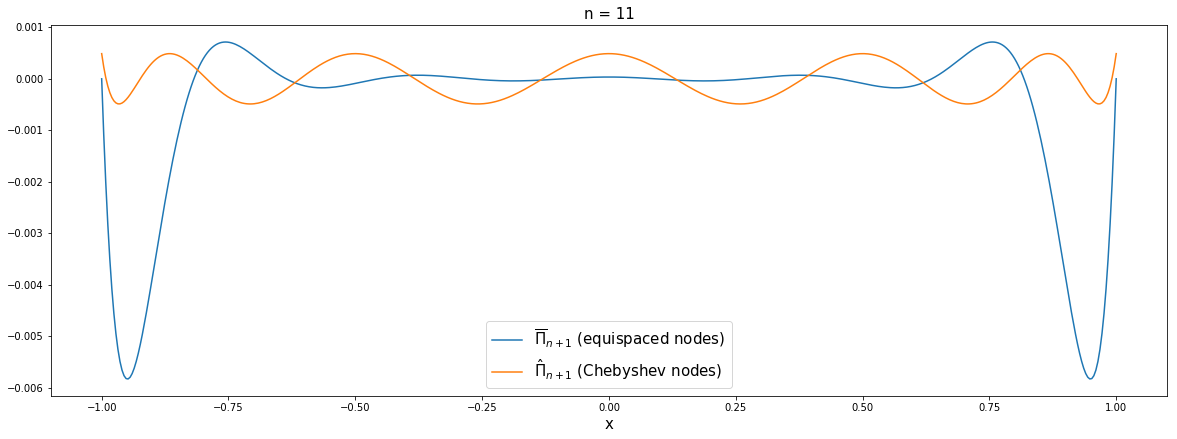

In [13]:
# Plot of the two polynomials on [-1,1]

## function that evaluates a polynomial with dominant coefficient equal to 1
## P = (x-x0)(x-x1)...(x-xn)
## input : x = vector containing the roots x0, ... xn
##         X = vector (or real) containing the points x on which the polynomial has to be evaluated
## output : R = values of the polynomial at points X
##              R[i] = P(X[i])
def evalPolywithRoots(x,X):
    R = 1
    for xi in x:
        R = R*(X-xi)
    return R

n = 11
xequi = np.linspace(-1,1,n+1) # list of n+1 equispaced nodes
xcheb = xhat(n+1)  # list of n+1 chebychev nodes
X = np.linspace(-1,1,500)  # points to evaluate the polynomials

# Evaluate \bar Pi_{n+1} for equispaced nodes
Un = evalPolywithRoots(xequi,X)  
# Evaluate \hat Pi_{n+1} for chebychev nodes
Unhat = evalPolywithRoots(xcheb,X)

# plots
figure = plt.figure(figsize = (20,15))
plt.subplot(211)
plt.plot(X,Un,label='$ \overline{\Pi}_{n+1}$ (equispaced nodes)')
plt.plot(X,Unhat,label='$\hat \Pi_{n+1}$ (Chebyshev nodes)')
plt.xlabel('x',fontsize = 15)
plt.legend(fontsize = 15,loc = 'lower center')
plt.title('n = '+str(n),fontsize = 15)
plt.show()

We observe that the two polynomials oscillate but the oscillations increase at the edges of the interval in the case of equispaced nodes, so that the upper bound for $\lvert\overline \Pi_n\rvert$ is greater than the one for $\lvert \hat \Pi_n \rvert$. This suggests that interpolation should behave better if based on the Chebyshev nodes rather than the equispaced ones.


In fact, for a given value of $n$, the following theorem proves that the Chebyshev nodes $(\hat x_0,\ldots,\hat x_n)$ is one of the optimal choices of nodes to minimize $\Delta(x_0,\ldots,x_n)$:

<div  markdown=1 class="Thm"> Let $n \in \mathbb{N}$. For any set of points $(x_0,\ldots,x_n)$ there holds

$$ \Delta(\hat x_0,\ldots,\hat x_n)  \leq \Delta( x_0,\ldots, x_n)$$

> **Proof.** Let $(x_0,\ldots,x_n)$ be a set of points and denote again $\Pi_{n+1}(x)=(x-x_0)(x-x_1)\cdots(x-x_n)$ and $\hat \Pi_{n+1}(x) = \frac{T_{n+1}(x)}{2^{n}} = (x-\hat x_0)(x-\hat x_1)\cdots(x-\hat x_n)$. We have to prove that
>
>$$
\sup_{x \in [-1,1]} \hat\Pi_{n+1}(x) \leq \sup_{x \in [-1,1]} \lvert \Pi_{n+1}(x) \rvert
$$
> which can be rewritten
>$$
\sup_{x \in [-1,1]} \frac{\lvert T_{n+1}(x)\rvert}{2^{n}} \leq \sup_{x \in [-1,1]} \lvert \Pi_{n+1}(x). \rvert
$$
>
> Assume by contradiction that 
> $$\sup_{x \in [-1,1]} \lvert \Pi_{n+1}(x)\rvert < \sup_{x \in [-1,1]} \frac{\lvert T_{n+1}(x)\rvert}{2^{n}} $$
> 
> From this and the properties of $T_{n+1}$ we have that, for all $x\in [-1,1]$, $\displaystyle \lvert \Pi_{n+1}(x) \rvert < \frac{1}{2^{n}}$. 
>
> Let us now consider $\displaystyle D_{n}(x) = \Pi_{n+1}(x) - \frac{ T_{n+1}(x)}{2^{n}} $ which is a polynomial of degree at most $n$ (since $\Pi_{n+1}$ and $  T_{n+1}/2^{n}$ have the same leading coefficient, $1$). 
> From the bound on $\Pi_{n+1}$ and the properties of $T_{n+1}$ we have
> - $\displaystyle D_{n}\left(\cos\left(\frac{2k\pi}{n+1}\right)\right) < 0, \quad 0\leq 2k \leq n+1$
> - $\displaystyle D_{n}\left(\cos\left(\frac{(2k+1)\pi}{n+1}\right)\right) > 0, \quad 0\leq 2k+1 \leq n+1$
>
> By the intermediate value theorem, this implies that $D_{n}$ must vanish $n+1$ times. This is not possible since it is a (non-zero) polynomial of degree at most $n$. 

In particular, we have $\Delta(\hat x_0,\ldots,\hat x_n)  \leq \Delta( \overline x_0,\ldots, \overline x_n)$ as expected. Let us plot the interpolant of the $Runge$ function for these new Chebyshev nodes for $n=10$ and $n=20$ (to be compared to the previous results for equispaces nodes):

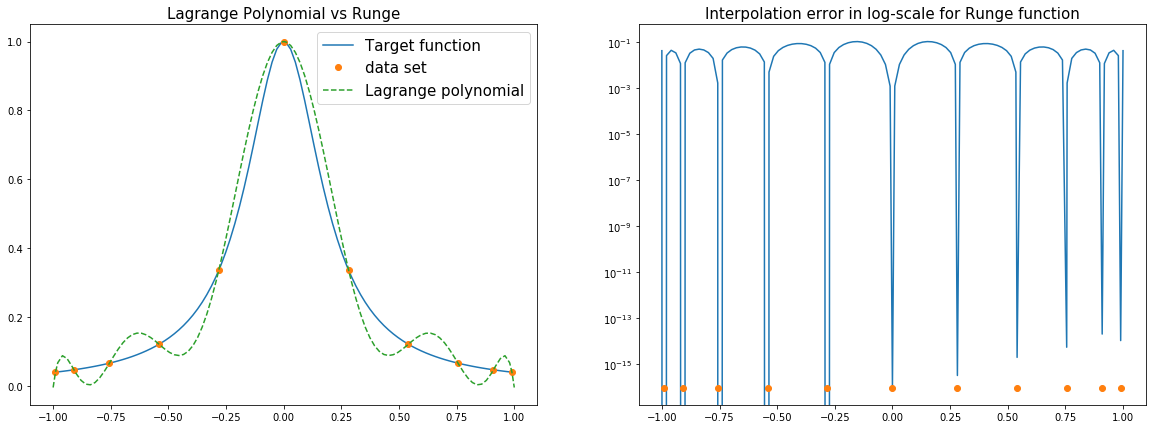

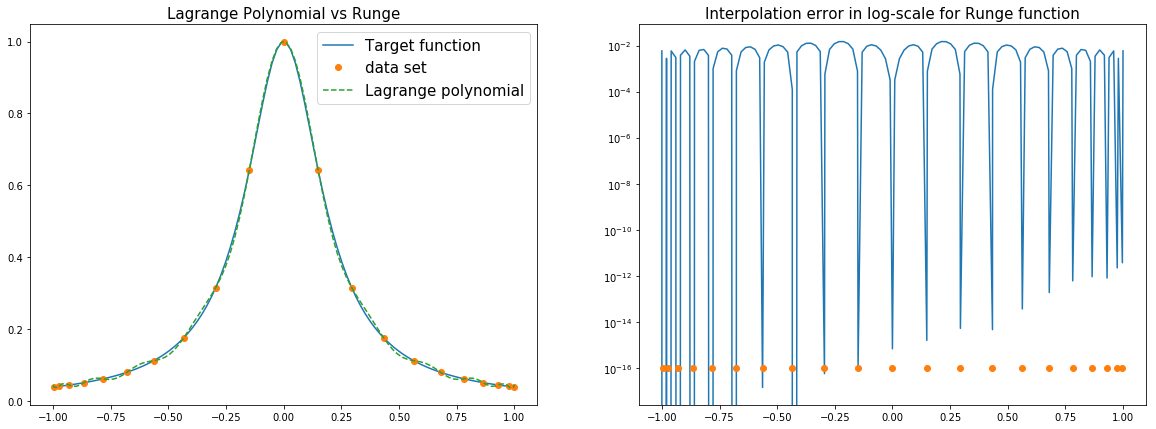

In [14]:
n1 = 10; n2 = 20
x1 = xhat(n1+1) # n1+1 chebyshev nodes: roots of T_{n1+1}
x2 = xhat(n2+1) # n2+1 chebyshev nodes: roots of T_{n2+1}
showLagrange(Runge,x1)
showLagrange(Runge,x2)

As expected, the behaviour of the interpolant is much better using Chebychev nodes.

<div markdown = 1, class = "Def"> The function $f$ we note $\hat{P}_n$ the Lagrange polynomial interpolating $f$ at the Chebyshev nodes. We call $E_{\text{cheb}}(n)$ the corresponding uniform error that is:

$$E_{\text{cheb}}(n) = \sup_{[a,b]}\,\lvert f(x) - \hat P_n(x) \rvert$$

We check on the following plot that the uniform error actually behaves better for the Chebychev nodes than the equispaced ones for the sine and Runge functions. 

In [15]:
## function that computes the uniform error on [-1,1] 
## for a given set of values of n = 1..nmax and chebyshev points
## input : f = function to be interpolated
##         nmax = maximal value of n
## output : ns = vector which contains the values of n tested: 
##               ns = 1 .. nmax
##          Echeb = vector which contains the corresponding values of the uniform error
##                  Echeb[n] = E_cheb(n) = sup (f - \hat Pn) 

def ErrorCheb(f, nmax):
    ns = np.arange(1,nmax) # values of n to be tested
    Echeb = np.zeros(ns.size) # Pre-allocation
    Xtest = np.linspace(-1,1,200)  # points discretizing [a,b] to compute the uniform error
    for n in ns:
        # loop on n, for each n, compute the uniform error on [-1,1]
        x = xhat(n+1) # chebyshev nodes to compute the interpolant
        y = f(x)  # values of f at these nodes
        # computation of the values of the Lagrange polynomial at points X
        (PX, delta) = LagrangeInterp(x,y,X)
        # computation of the corresponding uniform error
        Echeb[n-1] = np.max(abs(PX - f(X)))
    return (ns, Echeb)


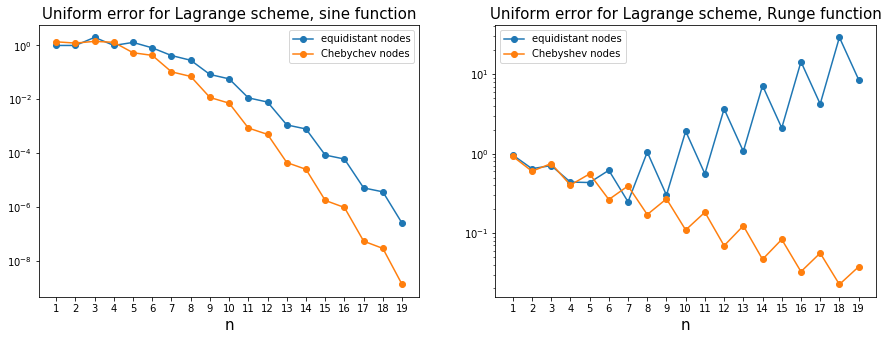

In [16]:
nmax=20

fig = plt.figure(figsize = (15,5))
# plot the errors for sine function (equispaced and chebyshev nodes)
plt.subplot(121)
(ns, Eequi) = ErrorEqui(sineWave, nmax)
(ns, Echeb) = ErrorCheb(sineWave, nmax)
plt.semilogy(ns,Eequi,marker='o',label='equidistant nodes')
plt.semilogy(ns,Echeb,marker='o',label='Chebychev nodes')
plt.legend()
plt.title('Uniform error for Lagrange scheme, sine function',fontsize = 15)
plt.xlabel('n',fontsize = 15)
plt.xticks(ns)
# plot the errors for Runge function (equispaced and chebyshev nodes)
plt.subplot(122)
(ns, Eequi) = ErrorEqui(Runge, nmax)
(ns, Echeb) = ErrorCheb(Runge, nmax)
plt.semilogy(ns,Eequi,marker='o',label='equidistant nodes')
plt.semilogy(ns,Echeb,marker='o',label='Chebyshev nodes')
plt.legend()
plt.title('Uniform error for Lagrange scheme, Runge function',fontsize = 15)
plt.xlabel('n',fontsize = 15)
plt.xticks(ns)
plt.show()

plt.show()

We already proved that both approximations of the sine function converge as predicted by theory (it must converges for any choice of nodes). As expected, the convergence for the Chebyshev nodes is better than for equispaced nodes. 

Concerning the $Runge$ function, as already seen, the equidistant choice does not provide a converging approximation. On the contrary, the interpolant based on the Chebyshev nodes is (slowly) uniformly converging for this function.

<div markdown = 1, class = "Rmk"> In theory, although the Chebyshev repartition of roots is better than the equispaced repartition, one can show that there are still some functions for which:

$$\lim_{n \to +\infty}E_{\text{cheb}}(n) = + \infty$$

This means that the Lagrange interpolation method does not always succeed, even with the Chebyshev nodes.  

In fact, there is no repartition of points that would work for every function. That is, if for each $n$ we choose a set of $n$ points in $[a,b]$, there will always a function $f$ such that, letting $(P_n)_{n}$ the sequence of Lagrange interpolation polynomial of $f$ at these points, 

$$ \lim_{n \to +\infty} \sup_{x \in [a,b]} \lvert f(x) - P_n(x)\rvert = + \infty$$

### Case study 1: a solution using Lagrange interpolation

First, recall that we want to model the evolution of the world population, using the data set given in the introduction. The first objective is to estimate the population at year 1951, the second one is to determinate the year for which the polulation was equal to 2.2 billions. 

To begin with, we store the data in a numpy array and plot the evolution of population.

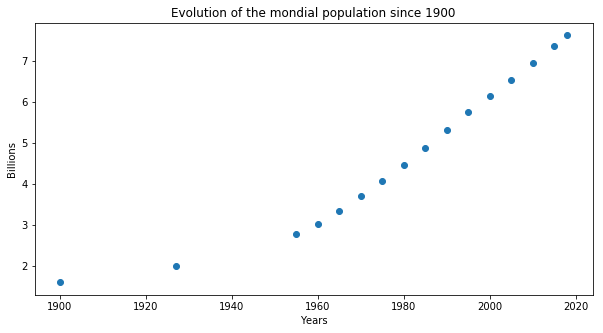

In [17]:
yearsData = np.array([1900,1927,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2018])
popData = np.array([1.6,2,2.772242535,3.033212527, 3.339592688,3.700577650,4.079087198,4.458411524,
                4.873781796,5.330943460,5.751475416,6.145006989,6.542159383,6.958169159,7.383008820,7.632819325])

plt.figure(figsize=(10,5))
plt.plot(yearsData,popData,linestyle='',marker="o")
plt.title('Evolution of the mondial population since 1900')
plt.xlabel('Years')
plt.ylabel('Billions')
plt.show()

We want to approximate the population using a simple polynomial curve. To evaluate the population in 1951, we just have to evaluate the polynomial at $x = 1951$. To determine the year at which the population was equal to $2.2$ billions, we can use the rootfinding methods developped in the previous practical session, that is find the zero of $P(x) - 2.2$ where $P$ is the polynomial. 

To compute a polynomial approximatin the data, we use the Lagrange polynomial approximation. The next example shows that if we take all the data points, the interpolation yields very bad results:

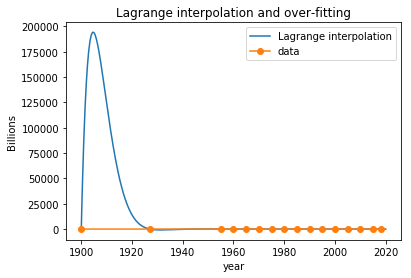

In [18]:
yearsPlot = np.linspace(1900,2020,500) #set of years for the plot
x = yearsData  #nodes of the interpolation
y = popData  #values to interpolate
(R,delta) = LagrangeInterp(x, y, yearsPlot)  #computations of the corresponding Lagrange polynomial

# We plot the interpolating curve
plt.plot(yearsPlot,R,label='Lagrange interpolation')
plt.plot(x,y,marker = 'o',label='data')
plt.title('Lagrange interpolation and over-fitting')
plt.legend()
plt.xlabel('year')
plt.ylabel('Billions')
plt.show()

Again, the use of a too large data set causes oscillations in the interpolation due to the use of a polynomial of high degree. This kind of situation is analog to "overfitting" in machine learning and statistics. Overfitting often arises when one uses a model with too many parameters to fit a data set. This leads to great accuracy at the training (known) data and bad accuracy at the test (unknown) data. It is generally thought that a model that has less parameters will have better generalization capacities. 

So here, a possible idea is to restrict the number of data points and choose them around the zone we are interested in. This will lead to an approximation by a polynomial of lower-order, with smaller coefficients. 

We will use this technique to approximate locally the population curve near the zone that concerns us, namely near the years 1940 - 1960. We compute and plot below the interpolation obtained using the years 1900, 1927, 1955 and 1960.

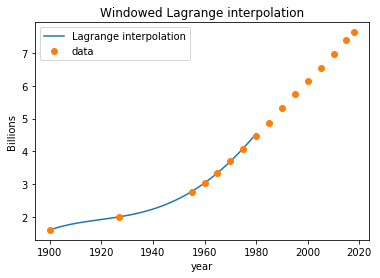

In [19]:
Xyear = np.linspace(1900,1980,50) #set of years for the plot
xyear = yearsData[0:5]  #nodes of the interpolation = [1900 1927 1955]
y = popData[0:5]    #values to interpolate
PX, delta = LagrangeInterp(xyear, y, Xyear)  #computations of the corresponding Lagrange polynomial

# We plot the interpolating curve
plt.plot(Xyear,PX,label='Lagrange interpolation')
plt.plot(yearsData,popData,linestyle='',marker = 'o',label='data')
plt.title('Windowed Lagrange interpolation')
plt.legend()
plt.xlabel('year')
plt.ylabel('Billions')
plt.show()

We can now use this Lagrange polynomial $P$ to estimate the population at year 1951. We compare to the true value 2,583,816,786.

In [20]:
year = 1951
popTarget = 2.583816786
pop = eval_Horner(delta,xyear[:-1],year)
print('According to Lagrange method, there were',pop,'billions of human beings in',year, '\nerror =',abs(pop-popTarget))


According to Lagrange method, there were 2.59480745387 billions of human beings in 1951 
error = 0.0109906678682


We now want to use this Lagrange polynomial $P$ to estimate the year at which the population was equal to $2.2$ billions. To do so, we use the bisection method developped in the previous practical session to find a root of the function $f(x) = P(x)-2.2$ 

In [21]:
## Bisection algorithm for function f
## input : f = name of the function
##         a0, b0 = initial intervall I_0 with f(a0)f(b0)<0
##         eps  = tolerance
##         Kmax = maximal number of iterations allowed
## output : x = sequence approximating the zero of f

def Bisection(f,a0,b0,eps,Kmax):
    # create vector x
    x = np.zeros(Kmax+1)
    k = 0
    a = a0
    b = b0
    x[0] = (a+b)/2  # sets x_0 = (a+b)/2
    # computation of x_k
    while (b0-a0)/(2**k) >= eps and k < Kmax:
        if f(a)*f(x[k]) < 0:
            b = x[k]
        else:
            a = x[k]
        k = k+1
        x[k] = (a+b)/2
    return (x, k)

In [22]:
## f(x) = P(x) - 2.2
def f(y):
    return (eval_Horner(delta,xyear[:-1],y) - 2.2)

## initialization of the parameters of the bisection method
a0 = 1930
b0 = 1960
eps = 1e-10
Kmax = 50

(x,k) = Bisection(f,a0,b0,eps,Kmax)

year = int(x[k])
months = ['jan.','feb.','mar.','apr.','may','june','jul.','aug.','sep.','oct.','nov.','dec.']
m = months[int((x[k]-year)*12)]
print('According to Lagrange method, the population went above',2.2,'billions in',m,'of',year)

According to Lagrange method, the population went above 2.2 billions in june of 1938


### Instabilities and Roundoff errors...

One drawback of polynomial interpolation is the **instability** of the interpolant. Indeed, suppose that we want to interpolate a function $f$ at points $(x_k)_k$ and suppose that the available values of $f$ at these points are not exact (think for example of noise due to experimental measurements). In that case, we have 

$$ y_k = f(x_k) + \beta_k$$

with $\beta_k$ a small random variable. We observe below the behaviour of the interpolation with the two choices for the nodes (equispaced and Chebyshev).

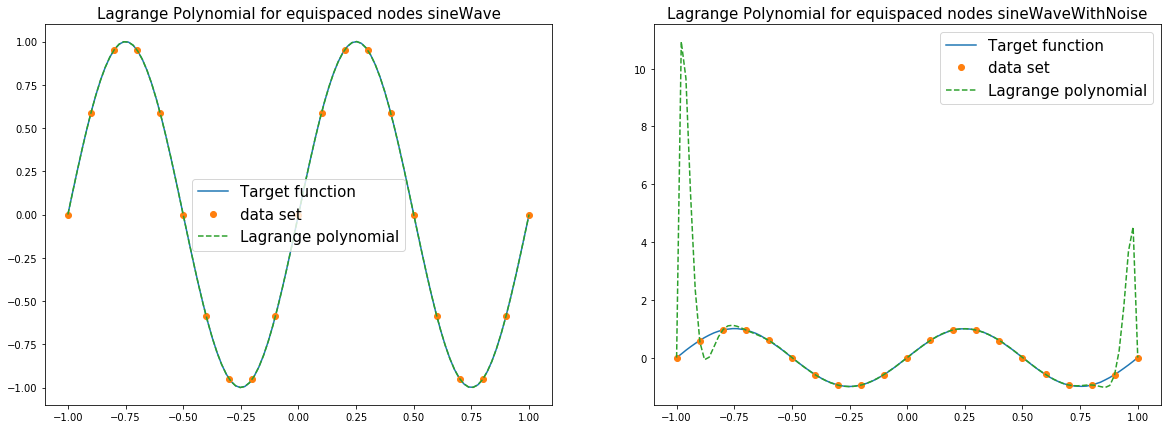

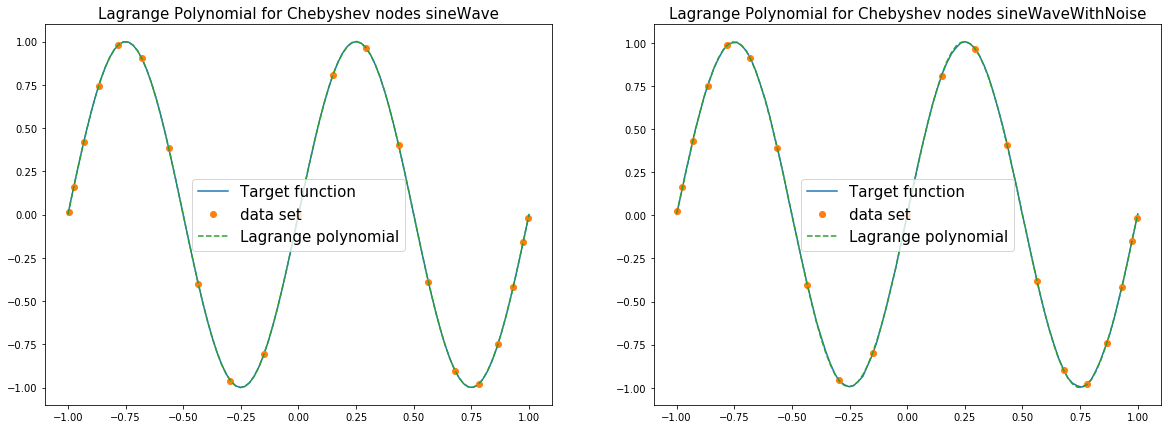

In [23]:
def sineWaveWithNoise(x):
    return np.sin(2*pi*x) + np.random.rand(x.size)*1e-2

n=20

## 1) Equispaced nodes

x=np.linspace(-1,1,n+1)
X = np.linspace(-1,1,100)  # points to plot the interpolant and the error   
fig = plt.figure(figsize=(20, 7))
# plot of the function without noise and its interpolant on the left figure
plt.subplot(121)
f = sineWave
y = f(x)   # values of f at the nodes
(PX, delta) = LagrangeInterp(x, y, X) 
plt.plot(X,f(X),label = 'Target function')
plt.plot(x,f(x),marker='o',linestyle='',label = 'data set')
plt.plot(X,PX,'--',label='Lagrange polynomial')
plt.legend(fontsize=15)
plt.title('Lagrange Polynomial for equispaced nodes '+f.__name__,fontsize=15)
# plot of the function with noise and its interpolant on the right figure
plt.subplot(122)
f = sineWaveWithNoise
y = f(x)   # values of f at the nodes
(PX, delta) = LagrangeInterp(x, y, X) 
plt.plot(X,f(X),label = 'Target function')
plt.plot(x,f(x),marker='o',linestyle='',label = 'data set')
plt.plot(X,PX,'--',label='Lagrange polynomial')
plt.legend(fontsize=15)
plt.title('Lagrange Polynomial for equispaced nodes '+f.__name__,fontsize=15)
plt.show()

## 2) Chebyshev nodes

x=xhat(n+1)
X = np.linspace(-1,1,100)  # points to plot the interpolant and the error   
fig = plt.figure(figsize=(20, 7))
plt.subplot(121)
# plot of the function without noise and its interpolant on the left figure
f = sineWave
y = f(x)   # values of f at the nodes
(PX, delta) = LagrangeInterp(x, y, X) 
plt.plot(X,f(X),label = 'Target function')
plt.plot(x,f(x),marker='o',linestyle='',label = 'data set')
plt.plot(X,PX,'--',label='Lagrange polynomial')
plt.legend(fontsize=15)
plt.title('Lagrange Polynomial for Chebyshev nodes '+f.__name__,fontsize=15)
# plot of the function with noise and its interpolant on the right figure
plt.subplot(122)
f = sineWaveWithNoise
y = f(x)   # values of f at the nodes
(PX, delta) = LagrangeInterp(x, y, X) 
plt.plot(X,f(X),label = 'Target function')
plt.plot(x,f(x),marker='o',linestyle='',label = 'data set')
plt.plot(X,PX,'--',label='Lagrange polynomial')
plt.legend(fontsize=15)
plt.title('Lagrange Polynomial for Chebyshev nodes '+f.__name__,fontsize=15)
plt.show()

We already proved that the interpolant converges to the sine function for both sets of points. However, we can observe the instability of the method for high numbers of points: even for very small noise on the data, the interpolant is no more close to the original function... Note that Chebyshev nodes behave better than equispaced nodes, but also show instability for higher numbers of nodes.

**The instability of a numerical method tremendously limits the range of its applications: users want the approximation to be close to the original function, even if the data set exhibits noise.**

Another drawback of Lagrange interpolation is the arrival of roundoff errors for high numbers of points... This is illustrated below, where we plot the uniform error of the interpolants based on equispaced and Chebyshev nodes for the sine function (case for which the interpolant is supposed to converge to the original function):


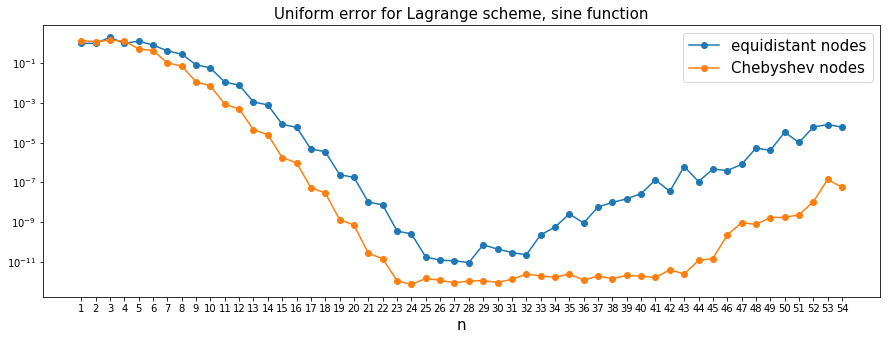

In [24]:
## plot the uniform error versus n for the sine function
## in that case, the uniform error is supposed to go to zero when n goes to infinity 
## whatever is the choice of points
## Test for equispaced and chebyshev nodes.

nmax=55

fig = plt.figure(figsize = (15,5))
(ns, Eequi) = ErrorEqui(sineWave, nmax)
(ns, Echeb) = ErrorCheb(sineWave, nmax)
plt.semilogy(ns,Eequi,marker='o',label='equidistant nodes')
plt.semilogy(ns,Echeb,marker='o',label='Chebyshev nodes')
plt.legend(fontsize = 15)
plt.title('Uniform error for Lagrange scheme, sine function',fontsize = 15)
plt.xlabel('n',fontsize = 15)
plt.xticks(ns)
plt.show()

** Again, the existence of roundoff errors prevents the use of the method for high numbers of nodes**

The existence of functions for which the Lagrange interpolant does not converge, together with the numerical instability of the method and roundoff errors, limit the range of applications of Lagrange interpolation. In many cases, one wish to have the guarantee that, as the number of interpolation points increases, the quality of the approximation tends to zero (even for noisy data sets). This is a feature of Piecewise interpolation that we will study next. 

<a id="PiecewiseInterp"></a>
## Piecewise interpolation

To obtain converging approximations for a wider class of function and stable methods, one can choose to consider polynomial interpolation on subintervals. The piecewise interpolant is supposed to converge to the original function when the number of intervals goes to infinity (while the degree of the polynomials on each subinterval is fixed). Doing so, one can use polynomials of lower degrees on each subinterval and avoid Runge phenomenon.

Let $(x_k)_{k=0\ldots n}$ be $n+1$ distinct given points in $[a,b]$ with $x_0=a$ and $x_n=b$. For the sake of simplicity, suppose that these points are ordered: $x_k<x_{k+1}$ for $k=0\ldots n-1$. We consider the corresponding subdivision of the interval:

$$
[a,b] = \bigcup_{k=0}^{n-1} [x_k,x_{k+1}].
$$

The set of points $(x_k)_{k=0\ldots n}$ is said to be a **mesh of the interval $[a,b]$** and we define the **mesh size** as:

$$h = \max_{k=0\ldots n-1}{\lvert x_{k+1} - x_k \rvert}.$$

This parameter is supposed to go to zero: the smaller $h$, the smaller each of the subintervals of the subdivision.

### Piecewise constant interpolation: $\mathbb{P}^0$-interpolation

The first idea is to use constant functions to approximate $f$ on each subinterval (i.e. polynomials of degree 0).

<div markdown = 1 class = "Def"> **$\mathbb{P}^0$-interpolant.** Let $f$ be a function defined on $[a,b]$ and a set of $n+1$ points $(x_k)_{0\leq k\leq n}$, with $x_0 = a$ and $x_n = b$. The piecewise constant interpolate of $f$ on $[a,b]$ with respect to the points $(x_k)_k$ is the function $\Pi^0 f$ defined on $[a,b]$ by 

- for $0\leq k<n$, $\quad \Pi^0 f$ is constant on $[x_k, x_{k+1}[$ 
- for $0\leq k<n$, $\quad\Pi^0 f(x_k) = f(x_k)$

We plot below the $\mathbb{P}^0$-interpolant of the sine and Runge functions.

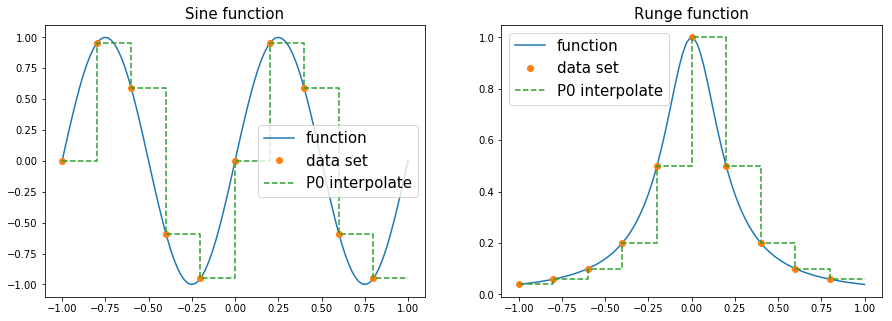

In [25]:
## Plots the sine (left) and Runge (right) functions, together with their P0 interpolation
## we use the fact that plt.plot(x,y) plots lines between the points (x[k],y[k])

n=10

fig = plt.figure(figsize = (15,5))
# equispaced points x=[x0, x1, ... xn]
x = np.linspace(-1,1,n+1) 
# create the vector [x0, x1, x1, x2, x2, ... , x{n-1}, xn] (to plot piecwise constant functions)
x2 = np.zeros(2*n)
x2[0:-1:2] = x[0:-1]
x2[1::2] = x[1:]
# points to plot the functions
X = np.linspace(-1,1,100)

plt.subplot(1,2,1)
f = sineWave
# y = [f(x0) ... f(xn)]
y = f(x) 
# create the vector [f(x0), f(x0), f(x1), f(x1), ... , f(x{n-1}), f(x{n-1})]
y2 = np.zeros(2*n)
y2[0:-1:2] = y[0:-1]
y2[1::2] = y[0:-1]
#plot the function
plt.plot(X,f(X),label='function')
#plot the P0 interpolation
plt.plot(x[:-1],y[:-1],marker='o',linestyle='',label = 'data set')
plt.plot(x2,y2,'--',label='P0 interpolate')
plt.title('Sine function',fontsize=15)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
f = Runge
# y = [f(x0) ... f(xn)]
y = f(x)
# create the vector [f(x0), f(x0), f(x1), f(x1), x2, ... , f(x{n-1}), f(x{n-1})]
y2 = np.zeros(2*n)
y2[0:-1:2] = y[0:-1]
y2[1::2] = y[0:-1]
#plot the function
plt.plot(X,f(X),label='function')
#plot the P0 interpolation
plt.plot(x[:-1],y[:-1],marker='o',linestyle='',label = 'data set')
plt.plot(x2,y2,'--',label='P0 interpolate')
plt.title('Runge function',fontsize=15)
plt.legend(fontsize=15)

plt.show()


We can see that this interpolation behaves well, even in the case of the Runge function. In fact, the convergence of the $\mathbb{P}^0$-interpolant towards the function when the step of the mesh goes to zero can be proved and only requires the function $f$ to be of class $\mathcal{C}^1$.

<div markdown = 1, class = "Thm"> **Convergence of $\mathbb{P}^0$ interpolation.** If $f$ is of class $C^1$ one has 

$$ \sup_{x \in [a,b]} \lvert \Pi^0 f(x) - f(x) \rvert \leq h \sup_{x\in [a,b]} |f'|$$

>**Proof.**
> Let us choose an $x$ in $[a,b]$. Since point $x$ is in one of the subintervals, there exists an index $k_x$ with $0\leq k_x < n$ such that $x\in [x_{k_x},x_{k_x+1}]$. From the definition of $\Pi^0 f$ we get $\Pi^0 f(x) = f(x_{k_x})$. Then, from the Mean-Value theorem, we have the existence of $\xi_x\in [x_{k_x},x]$ such that
>
>$$
\lvert \Pi^0 f(x) - f(x) \rvert= \lvert f(x_{k_x}) - f(x) \rvert= \lvert (x_{k_x}-x) f'(\xi_x)\rvert \leq h \sup_{x\in [a,b]} |f'|.
$$
>
>This is true for any $x$ in $[a,b]$ and the upper bound does not depend on $x$. As a consequence we obtain the requested result:
>
>$$ \sup_{x \in [a,b]} \lvert \Pi^0 f(x) - f(x) \rvert \leq h \sup_{x\in [a,b]} |f'|/$$

<div markdown = 1, class = "Rmk"> A more classical way to define a piecewise constant function to approximate $f$ is to define the interpolant as
- for $0\leq k<n$, $\quad \Pi^0 f$ is constant on $[x_k, x_{k+1}[$ 

- for $0\leq k<n$, $\displaystyle\quad\Pi^0 f\left(\frac{x_k +x_{k+1}}{2}\right) = f\left(\frac{x_k +x_{k+1}}{2}\right)$

In that case, the interpolant is equal to the original function on the $n$ nodes: $\displaystyle \left( \frac{x_k +x_{k+1}}{2}\right)_{k=0..n-1}$ and the previous result of convergence still holds.

### Piecewise affine interpolation: $\mathbb{P}^1$-interpolation

The precision of the piecewise approximation can be increased by using affine approximations on the sub-intervals (that is using a polynomial interpolant of degree 1).

<div markdown = 1 class = "Def"> **$\mathbb{P}^1$-interpolant.** Let $f$ be a function defined on $[a,b]$ and a set of $n+1$ points $(x_k)_{0\leq k\leq n}$, with $x_0 = a$ and $x_n = b$. The piecewise linear interpolant of $f$ on $[a,b]$ with respect to the points $(x_k)_k$ is the function $\Pi^1 f$ defined on $[a,b]$ by 

- for $0\leq k<n$, $\quad \Pi^1 f$ is affine on $[x_k, x_{k+1}[$ 
- for $0\leq k\leq n$, $\quad\Pi^1 f(x_k) = f(x_k)$

We plot below the $\mathbb{P}^1$-interpolant of the sine and Runge functions.

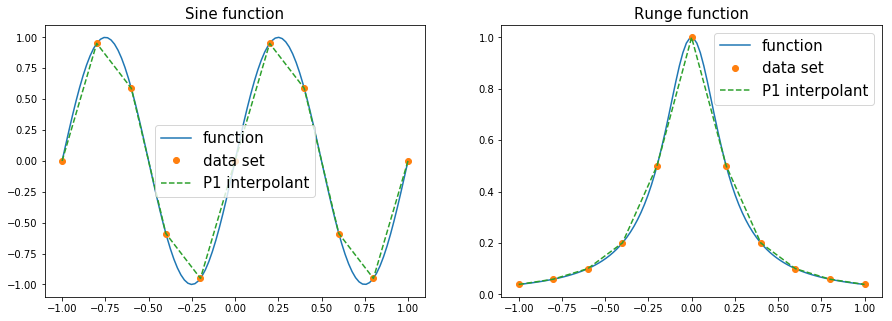

In [26]:
## Plots the sine (left) and Runge (right) functions, together with their P1 interpolation
## we use the fact that plt.plot(x,y) plots lines between the points (x[k],y[k])
n=10

fig = plt.figure(figsize = (15,5))
# equispaced points x=[x0, x1, ... xn]
x = np.linspace(-1,1,n+1)
# points to plot the functions
X = np.linspace(-1,1,100)

plt.subplot(1,2,1)
f = sineWave
y = f(x)
plt.plot(X,f(X),label='function')
plt.plot(x,y,marker='o',linestyle='',label = 'data set')
plt.plot(x,y,'--',label='P1 interpolant')
plt.title('Sine function',fontsize=15)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
f = Runge
y = f(x)
plt.plot(X,f(X),label='function')
plt.plot(x,y,marker='o',linestyle='',label = 'data set')
plt.plot(x,y,'--',label='P1 interpolant')
plt.title('Runge function',fontsize=15)
plt.legend(fontsize=15)

plt.show()


The uniform error is lower than for the $\mathbb{P}^0$-intepolation. One can prove the following convergence result, of order 2 in the parameter $h$, provided the function $f$ is of class $\mathcal{C}^2$:

<div markdown = 1, class = "Thm"> **Convergence of $\mathbb{P}^1$ interpolation.** If $f$ is of class $C^2$ one has 

$$ \sup_{x \in [a,b]} \lvert \Pi^1 f(x) - f(x) \rvert \leq \frac{h^2}{8} \sup_{x\in [a,b]} |f''|$$

> **Proof**
> Let us choose an $x$ in $[a,b]$. Since point $x$ is in one of the subintervals, there exists an index $k_x$ with $0\leq k_x < n$ such that $x\in [x_{k_x},x_{k_x+1}]$.
> Remark that $\Pi^1 f$ is the Lagrange polynomial interpolating $f$ on $[x_{k_x},x_{k_x+1}]$ based on the nodes $x_{k_x}$ and $x_{k_x+1}$. Then, one can use the error approximation theorem for Lagrange interpolation and get the existence of $\xi_x\in[a,b]$ such that
>
>$$
\lvert \Pi^1 f(x) - f(x) \rvert = (x-x_{k_x})(x-x_{k_x+1})\frac{f''(\xi_x)}{2!}
$$
>
>The maximum of the polynomial of order $2$ on the interval $[x_{k_x},x_{k_x+1}]$ is reached at point $(x_{k_x}+x_{k_x+1})/2$ so that we obtain the following upper-bound:
>
>$$
\lvert \Pi^1 f(x) - f(x) \rvert \leq \frac{h^2}{4}\frac{f''(\xi_x)}{2!} \leq \frac{h^2}{8} \sup_{x\in [a,b]} |f''|
$$
>
> This being true for any $x$ in $[a,b]$, the theorem is proved.

<div markdown = 1, class = "Rmk">  
- This can be generalized to polynomial piecewise approximation with higher degree polynomials. 
- Note that one of the drawback of this kind of approximation is that the interpolating function is less regular than the initial function: the $\mathbb{P}^0$ interpolant is not continuous while the function is supposed to be $\mathcal{C}^1$ and the $\mathbb{P}^1$ interpolant is not differentiable while the function is supposed to be $\mathcal{C}^2$. A possible improvement is to consider piecewise approximations using polynomials of order 3. In that case, one can construct an interpolant of class $\mathcal{C}^2$ on the whole interval $[a,b]$ which is called the **cubic spline** interpolant.

### Case study 2: a solution using piecewise polynomial interpolation

Recall we want to compute 

$$\pi=4\int_{0}^{1}d_{atan}(x)dx $$

where 

$$ d_{atan}:
\left\{\begin{array}{l}
                           \mathbb{R} &\rightarrow &\mathbb{R} \\
                            x &\rightarrow &\frac{1}{1+x^2}
                            \end{array}\right.
$$

To do so, we compute the piecewise interpolation of $d_{atan}$ based on equispaced nodes and approximate the original integral by the integral of the corresponding interpolation.

Consider an equipartition $(x_0,...x_n)$ of the segment $[a,b]$. This means that :

 $$\begin{array}{l}
        x_0=a,\qquad x_n=b \\
        \forall i\in\{0,..,n-1\},\quad x_{i+1}-x_{i}=\frac{b-a}{n}=h
     \end{array}$$ 
     
 The integral of the $\mathbb{P}^0$-interpolation is the sum of the area of each rectangle $[x_i,x_{i+1}]\times[0,f(x_i)]$ and thus, the integral is :
 
 $$\int_a^b \mathbb{P}^0f(x)dx=h\left(\sum_{i=0}^{n-1}f(x_i)\right)$$
 
This formula is also called the "rectangle" formula for numerical integration.

In [27]:
## Computes the integral of the P0-approximation corresponding to equidistant interpolation points
## inputs: f = function to integrate
##         a = lower bound of the integral
##         b = upper bound of the integral
##         n = number of interpolation points
## output: value of the icorresponding integral

def intP0Equi(f,a,b,n):
    x=np.linspace(a,b,n+1) # n+1 equidistant points
    y=f(x)
    return(np.sum(y[:-1:])*(b-a)/n)

We use this formula to compute $\pi$ as the integral on $[0,1]$ of $d_{atan}$:

In [28]:
def datan(x):
    return(1/(1+x**2))

a=0
b=1
n=50
piNum = 4*intP0Equi(datan,a,b,n)
print('P0-interpolation: piNum =',piNum,',error =',abs(piNum-pi))

P0-interpolation: piNum = 3.16152598692 ,error = 0.0199333333335


One can also chose to use the $\mathbb{P}^1$-interpolation of $d_{atan}$ to approximate the integral.

 The integral of the $\mathbb{P}^1$-interpolation is the sum of the area of each rectangle $[x_i,x_{i+1}]\times[0,f(x_i)]$ to which is added the area of the triangular part $h*(f(x_{i+}1)-f(x_i))/2$ and thus, the integral is :
 
 $$\int_a^b \mathbb{P}^1f(x)dx=h\left(\sum_{i=0}^{n-1}\left(f(x_i)+\frac{f(x_{i+1})-f(x_i)}{2}\right)\right)$$
 
This formula is also called the "trapezium" formula for numerical integration.

In [29]:
## Computes the integral of the P1-approximation corresponding to equidistant interpolation points
## inputs: f = function to integrate
##         a = lower bound of the integral
##         b = upper bound of the integral
##         n = number of interpolation points
## output: value of the icorresponding integral

def intP1Equi(f,a,b,n):
    x=np.linspace(a,b,n+1)
    y=f(x)
    squarePart=np.sum(y[:-1:])*(b-a)/n
    trianglePart=np.sum(y[1:]-y[:-1:])*(b-a)/(2*n)
    return(squarePart+trianglePart)

In [30]:
a=0
b=1
n=50
piNum = 4*intP1Equi(datan,a,b,n)
print('P1-interpolation: piNum =',piNum,',error =',abs(piNum-pi))

P1-interpolation: piNum = 3.14152598692 ,error = 6.66666665392e-05


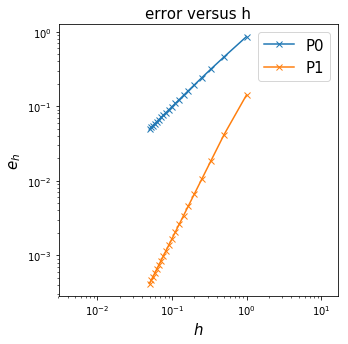

In [31]:
a=0
b=1

# Compute the integral and the error for different values of n
nMax=20
ns=np.arange(nMax)+1  # values of n

# initialization 
resP0Equi=np.zeros(ns.size)
resP1Equi=np.zeros(ns.size)

# loop on n 
for n in ns:
    resP0Equi[n-1]=4*intP0Equi(datan,a,b,n)
    resP1Equi[n-1]=4*intP1Equi(datan,a,b,n)

# computes the error for each n
errP0Equi=abs(resP0Equi-pi)
errP1Equi=abs(resP1Equi-pi)

# computes the mesh size for each n
h=(b-a)/ns

# plot of the error versus the mesh size
fig = plt.figure(figsize=(5, 5))
plt.loglog(h,errP0Equi, marker="x", label="P0") #log-log scale
plt.loglog(h,errP1Equi, marker="x", label="P1") #log-log scale
plt.title('error versus h', fontsize = 15)
plt.xlabel('$h$',fontsize = 15)
plt.ylabel('$e_h$',fontsize = 15)
plt.axis('equal')
plt.legend(loc='best', fontsize = 15)

plt.show()

We recover the order of convergence of the interpolation.

<a id="LeastSquare"></a>
## Least squares approximation

<table>
        <tr>
            <td><img src="figures/Legendre.jpg" alt="Legendre" style="width: 170px;" /></td>
            <td><img src="figures/Gauss.jpg" alt="Gauss" style="width: 190px;" /></td>
        </tr>
</table>

>**Adrien-Marie Legendre (1752 - 1833) and Carl Friedrich Gauss (1777 - 1855).**
>The method of least squares grew out of the fields of astronomy and geodesy, as scientists and mathematicians sought to provide solutions to the challenges of navigating the Earth's oceans. To do so, the accurate description of the behavior of celestial bodies was the key to enabling ships to sail in open seas, where sailors could no longer rely on land sightings for navigation. A seminal method, called the method of average was used for example by the french scientist Pierre-Simon Laplace to study the motion of Jupyter and Saturn. The first clear and concise exposition of the method of least squares was published by the French mathematician Adrien-Marie Legendre in 1805 (no portrait known apart from this caricature...). In 1809, the German mathematician Carl Friedrich Gauss published his method of calculating the orbits of celestial bodies. In that work he claimed to have been in possession of the method of least squares since 1795. This naturally led to a priority dispute with Legendre. However, to Gauss's credit, he went beyond Legendre and succeeded in connecting the method of least squares with the principles of probability and to the normal distribution.

Suppose now that you are in one (or several) of these cases:
- the dataset $(x_k,y_k)_{k=0..n}$ is big ($n$ is large)
- you want to estimate the behaviour of the function outside the original interval
- the dataset is noisy and you want to study its general behaviour by comparing the data with a given simple model (for example a polynomial function of low degree)

We have seen that a large number of interpolation points prevents the use of Lagrange interpolation which leads to highly oscillating polynomials of high degree. Moreover, both Lagrange interpolation for large datasets and piecewise interpolation aren't suitable to extrapolate the behaviour of the function from the available data, that is, to estimate the values at points lying outside (but close to) the original interval. Indeed, the first method would provide oscillating interpolants while the second one would only use the information of two points, completely neglecting the other available data.

We present here a method allowing to deal with these problems.

Assume that a dataset $(x_k,y_k)_{k=0..n}$ is given. One wants to find a polynomial $Q_m$ with degree at most $m$ such that for all $k=0..n$, $Q_m(x_k)$ is "close to" $y_k$. $Q_m$ does not fit the data in the sense that the equalities $Q_m(x_k)=y_k$ are not imposed.

Here, we consider the **least squares approximation** for which $Q_m$ has to be "close to" the data in the following sense: $Q_m$ is a polynomial of degree lower than $m$ minimizing the following functional $J$ among all the polynomials of degree lower than $m$

$$
J(Q) = \sum_{k=0}^n (Q(x_k) - y_k)^2
$$

In general, the method is used for large values of $n$ and small values of $m$. 

<div markdown = 1, class = "Rmk"> 
Note that, since all the terms of this sum are positive, 
- $J(Q)=0$ implies that for all $k$, $J(x_k)=0$ and $Q$ interpolates the data
- $J(Q)$ is "small", say smaller than a given small parameter $\varepsilon$, then for all $k$, $\lvert Q(x_k)-y_k\rvert\leq \sqrt{\varepsilon}$.

In that sense, $J(Q)$ measures how $Q$ is close to the data. Other choices for $J$ are possible. The least squares choice provides a convex function $J$ for which the existence and uniqueness of the minimizer can be proved.


### Constant approximation

Assume that the dataset $(x_k,y_k)_{k=0..n}$ is given and you want to find a constant polynomial $Q(x)=a$ such that $Q$ minimizes $J$ over the set of constant polynomials.

The unknown is coefficient $a$ and the problem comes back to find the constant $a^*$ minimizing the functional

$$
J(a) = \sum_{k=0}^n (Q(x_k) - y_k)^2 = \sum_{k=0}^n (a - y_k)^2
$$

In that case, the function $a \rightarrow J(a)$ is a polynomial of order 2 with a positive leading coefficient which implies that there exists a unique $a^*$ minimizing $J$ and that $a^*$ is solution to 

$$
J'(a^*) = 0
$$

This gives 

$$
\sum_{k=0}^n 2 (a^* - y_k) = 0
$$

and finally $a^*$ is the mean value of the data:

$$
a^* = \frac{1}{n} \sum_{k=0}^n y_k
$$

### Linear regression

Assume that the dataset $(x_k,y_k)_{k=0..n}$ is given and you want to find a linear polynomial $Q(x)=ax$ such that $Q$ minimizes $J$ over the set of linear polynomials.

Again, the unknown is the coefficient $a$ and the problem comes back to find the constant $a^*$ minimizing the functional

$$
J(a) = \sum_{k=0}^n (Q(x_k) - y_k)^2 = \sum_{k=0}^n (a\,x_k - y_k)^2
$$

The function $a \rightarrow J(a)$ is a polynomial of order 2 with a positive dominant coefficient which implies that there exists a unique $a^*$ minimizing $J$ and that $a^*$ is solution to 

$$
J'(a^*) = 0
$$

This gives 

$$
\sum_{k=0}^n 2 (a^* x_k - y_k)\, x_k = 0
$$

and finally $a^*$ is:

$$
 a^* = \frac{\displaystyle\sum_{k=0}^n x_k \, y_k}{\displaystyle\sum_{k=0}^n x_k^2}
$$

We implement below a function computing $a^*$ from a given dataset $(x_k,y_k)_{k=0..n}$.

In [32]:
## Computation of parameters astar for a linear model, using least squares 
## input : x = vector containing the nodes x0...xn
##         y = vector containing the values y0...yn
## output : astar = approximation of a

def LinearReg(x,y):
    return np.sum(x*y) / np.sum(x*x)

We test in the following the linear regression for linear data of slope $a$ with noise. $a^*$ is supposed to provide an approximation of the original slope $a$.

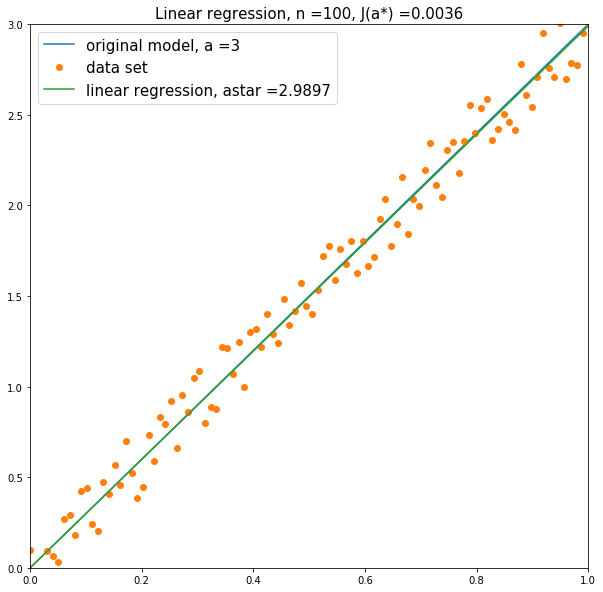

In [33]:
# size of the dataset
n = 100

# original model : f(x) = ax
a = 3
x = np.linspace(0,1,n)
y = a*x

# compute the data : add noise to the original model
noiseSize = 0.2
noise = (-1 + 2*np.random.rand(x.size))*noiseSize  # uniform in [-noiseSize,noiseSize]
data = y + noise

# compute the linear regression
astar = LinearReg(x,data)

# approximated model
ystar = astar*x

# computation of the value of J(astar,bstar)
error_vect = y - ystar
J = (error_vect*error_vect).sum()

#plot
fig = plt.figure(figsize = (10,10))
plt.plot(x,y,label='original model, a ='+str(a))
plt.plot(x,data,marker='o',linestyle='',label='data set')
plt.plot(x,ystar,label='linear regression, astar ='+str(round(astar,4)))
plt.xlim(0,1)
plt.ylim(0,a)
plt.legend(fontsize = 15)
plt.title('Linear regression, n ='+str(n)+', J(a*) ='+str(round(J,4)),fontsize = 15)
plt.show()


### Affine regression

Assume that the dataset $(x_k,y_k)_{k=0..n}$ is given and you want to find an affine polynomial $Q(x)=ax+b$ such that $Q$ minimizes $J$ over the set of linear polynomials.

In that case, there is two unknown coefficients $a$ and $b$. The problem comes back to find the constants $(a^*,b^*)$ minimizing the functional

$$
J(a,b) = \sum_{k=0}^n (Q(x_k) - y_k)^2 = \sum_{k=0}^n (a\,x_k + b - y_k)^2.
$$

The solution $(a^*,b^*)$ satisfies

$$
\forall a,b\quad J(a^*,b^*)\leq J(a,b)
$$

Fixing $b=b^*$ we obtain

$$
\forall a \quad J(a^*,b^*)\leq J(a,b^*)
$$

As a consequence, if we denote $G(a)=J(a,b^*)$, $a^*$ is a minimum of the functional $G$. We now remark as before that $a \rightarrow G(a)$ is a polynomial of order 2 with a positive dominant coefficient which implies that there exists a unique $a^*$ minimizing $G$ and that $a^*$ is solution to 

$$
G'(a^*) = 0,
$$

that is

$$
\frac{\partial J}{\partial a} (a^*,b^*) =0.
$$

Similarly, we prove that a second necessary condition is

$$
\frac{\partial J}{\partial b} (a^*,b^*) =0.
$$

Finally, we end up with two necessary conditions for two unknowns (it can be proved that the conditions are sufficient and ensure existence and uniqueness of the solution). Computing the two partial derivatives of $J$ we obtain

$$
\begin{array}{lll}
\displaystyle a^* \sum_{k=0}^n x_k^2 &+&\displaystyle  b^* \sum_{k=0}^n x_k &=&\displaystyle  \sum_{k=0}^n x_k y_k \\
\displaystyle a^* \sum_{k=0}^n x_k   &+&\displaystyle  b^* (n+1)                &=&\displaystyle  \sum_{k=0}^n y_k
\end{array}
$$

This is a linear system of two equations which can be written in a matrix formulation:

$$
M \left(\begin{array}{l} a^* \\ b^* \end{array} \right) = V \quad \text{where}\quad M = \left(\begin{array}{ll}
\displaystyle \sum_{k=0}^n x_k^2 &\displaystyle  \sum_{k=0}^n x_k \\
\displaystyle \sum_{k=0}^n x_k   &\displaystyle  (n+1)         
\end{array}\right) \quad \text{and}\quad
V = \left(\begin{array}{l} \displaystyle\sum_{k=0}^n x_k y_k \\ \displaystyle\sum_{k=0}^n y_k \end{array} \right)
$$

It can be shown that matrix $M$ is invertible (if $x_k$ is not a constant vector). The solution of this $2\times 2$ system is given by

$$
a^* = \cfrac{\sum_{k=0}^n x_k y_k - \sum_{k=0}^n x_k \bar{y}}{\sum_{k=0}^n x^2_k - \sum_{k=0}^n x_k \bar{x}} = \cfrac{\overline{xy} - \bar{x} \bar{y}}{\overline{x^2} - \bar{x}^2},
$$

$$
b^* =  \bar{y}-b^*\,\bar{x},
$$

where $\displaystyle\bar{x} = \frac{\sum_{k=0}^n x_k}{n+1}$, $\displaystyle \overline{xy} = \frac{\sum_{k=0}^n x_k y_k}{n+1}$ and $\displaystyle \overline{x^2} = \frac{\sum_{k=0}^n x^2_k}{n+1}$ for a given dataset $(x_k)_{k=0..n}$.

We implement below a function computing $(a^*,b^*)$ for the set of data $(x_k,y_k)_{k=0..n}$.

In [34]:
## Computation of parameters astar, bstar for an affien model, using least squares 
## input : x = vector containing the nodes x0...xn
##         y = vector containing the values y0...yn
## output : astar = approximation of a
##          bstar = approximation of b

def AffineReg(x,y): 
    mean_x  = x.mean()
    mean_y = y.mean()
    square_mean_x = (x*x).mean()
    cross_xy = (x*y).mean() 
    astar = (cross_xy-mean_x*mean_y)/(square_mean_x-mean_x*mean_x)
    bstar = mean_y - astar*mean_x
    return (astar,bstar)

We test in the following the affine regression for affine data $ax+b$ with noise. $(a^*,b^*)$ are supposed to provide an approximation of the original parameters $(a,b)$.

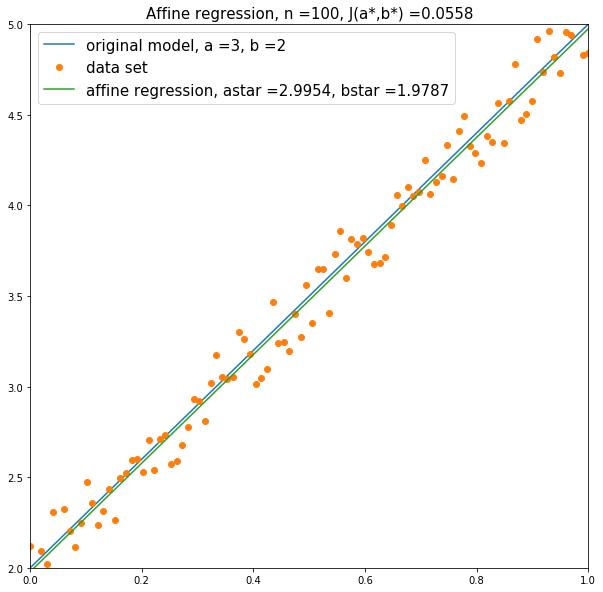

In [35]:
# size of the dataset
n = 100

# original model : f(x) = ax +b
a = 3
b = 2
x = np.linspace(0,1,n)
y = a*x + b

# compute the data : add noise to the original model
noiseSize = 0.2
noise = (-1 + 2*np.random.rand(x.size))*noiseSize  # uniform in [-noiseSize,noiseSize]
data = y + noise

# compute the affine regression
astar, bstar = AffineReg(x,data)

# approximated model
ystar = astar*x + bstar

# computation of the value of J(astar,bstar)
error_vect = y - ystar
J = (error_vect*error_vect).sum()

#plot
fig = plt.figure(figsize = (10,10))
plt.plot(x,y,label='original model, a ='+str(a)+', b ='+str(b))
plt.plot(x,data,marker='o',linestyle='',label='data set')
plt.plot(x,ystar,label='affine regression, astar ='+str(round(astar,4))+', bstar ='+str(round(bstar,4)))
plt.xlim(0,1)
plt.ylim(b,a+b)
plt.legend(fontsize = 15)
plt.title('Affine regression, n ='+str(n)+', J(a*,b*) ='+str(round(J,4)),fontsize = 15)
plt.show()

<div markdown = 1, class = "Rmk"> 
The generic case is to find an approximation of degree lower than $m$ which leads to the minimization of the functional

$$
J(a_0,a_1,\ldots a_n) = \sum_{k=0}^n (a_0 + a_1 x_k + \ldots + a_n x_k^n - y_k)^2
$$

This leads to $n+1$ unknowns $a_0^*,a_1^*,\ldots a_n^*$ and a linear system of $n+1$ equation to be solved: s

$$\frac{\partial J}{\partial a_k} (a_0^*,a_1^*,\ldots a_n^*)=0 \quad \text{for} \quad k=0\ldots n$$

### Case study 3: parameter estimation for the CAPM using least squares approximation

Recall that, being given the values of the market return $(R^m_k)_{k=1..n}$ and an asset return $(R_k)_{k=1..n}$ for $n$ days, one wants to estimate the parameters $\alpha$ and $\beta$ in order to model the behaviour of the corresponding asset as

$$
R_k = \alpha + \beta \, R^m_k.
$$

We use the least square approximation method to estimate these parameters for the data set $(x_k,y_k)_{k=1..n}=(R_k^m,R_k)_{k=1..n}$

#### Data description
The file Data_market.csv records the CAC 40 index and other assets returns from January 2015 to December 2015. The CAC 40 is a benchmark French stock market index and represents the variation of the whole market.

Data used come from https://www.abcbourse.com/download/historiques.aspx .

The data contains the daily asset return for the companies of the CAC40. A column corresponds to a given company and a line to a given day. The market return can be found in the last comumn. 

The data set can be explored using pandas python library designed to manage data sets. For example, a column can be extracted from the data set using its name, given in the first line of the column.

We focus on the asset "Société Générale", referenced as "Societe.Generale" in the dataset. 

In [36]:
## Load data 
import pandas as pd              # package for managing datasets

Namefile = "Data_market.csv"
Data = pd.read_csv(Namefile,sep=",")
Data.drop(['Unnamed: 0'],axis=1,inplace=True)

print(Data.head())

        Dates  Accor.Hotels  Air.Liquide    Airbus    Alstom       Axa  \
0  2015-01-05     -0.012959    -0.031456  0.003006 -0.025437 -0.037881   
1  2015-01-06     -0.021146    -0.008380  0.022905  0.000572 -0.010935   
2  2015-01-07      0.004983     0.004505  0.025714  0.011756  0.010663   
3  2015-01-08      0.019824     0.041231  0.033509  0.017934  0.040506   
4  2015-01-09     -0.000813    -0.022707 -0.014817 -0.006688 -0.022716   

   Bnp.Paribas  Bouygues  Cap.Gemini  Carrefour        ...         \
0    -0.049772 -0.037670   -0.013396  -0.049668        ...          
1    -0.026502 -0.007638   -0.039369  -0.007995        ...          
2    -0.016844  0.011607    0.004199  -0.001057        ...          
3     0.031905  0.029529    0.028064   0.044461        ...          
4    -0.034128 -0.009915    0.006093  -0.034781        ...          

   Societe.Generale    Solvay   Technip     Total  Unibail.Rodamco     Valeo  \
0         -0.045712 -0.040841 -0.048455 -0.061713        -0.

#### Affine regression

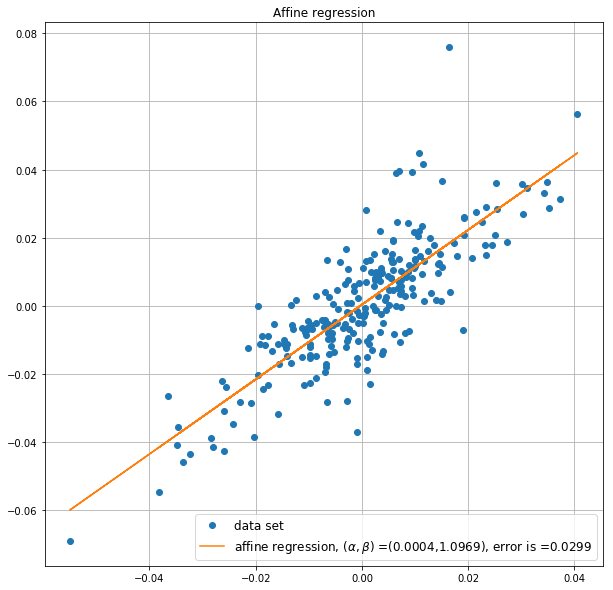

In [37]:
## Set parameters
asset_name = 'Societe.Generale' #The asset
market_index_name = 'Rnd.Market.Index' # Represents Rk^m
marketReturn = Data[market_index_name] # The market return for each k: x_k
assetReturn = Data[asset_name] # The asset return at day k: y_k

## Compute alpha and beta
beta_star, alpha_star = AffineReg(marketReturn,assetReturn)

## plot the results
fitted_values = alpha_star+beta_star*marketReturn # Affine model for the asset return
error_vect = assetReturn - fitted_values
error = (error_vect*error_vect).sum()

fig = plt.figure(figsize = (10,10))
plt.plot(marketReturn,assetReturn,marker='o',linestyle='',label='data set')
plt.plot(marketReturn,fitted_values,label=r'affine regression, $(\alpha,\beta)$ =('+str(round(alpha_star,4))+','+str(round(beta_star,4))+'), error is ='+str(round(error,4)))
plt.legend(fontsize = 12)
plt.title('Affine regression',fontsize = 12)
plt.grid()
plt.show()

#### Linear regression

We saw in the previous estimations thay the risk $\alpha$ was very small (it is the the intercept of the previous curve). This encourages us to simplify the CAPM model in a linear model:

$$
R_k = \beta \, R^m_k.
$$

and estimate only one parameter $\beta$ using linear regression:

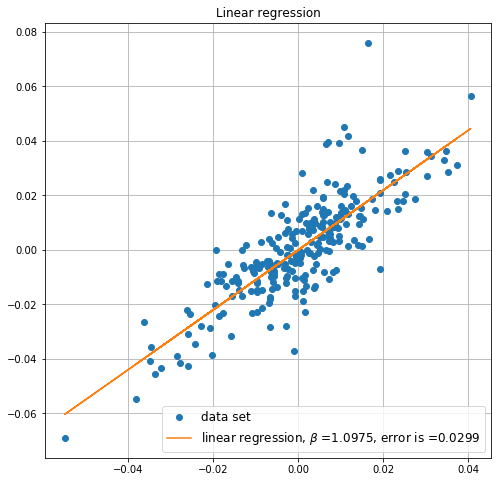

In [38]:
## Set parameters
asset_name = 'Societe.Generale'
market_index_name = 'Rnd.Market.Index'
y = Data[asset_name]
x = Data[market_index_name]

## Plot the result
beta_star = LinearReg(x,y)
fitted_values = beta_star*x
error_vect = y - fitted_values
error = (error_vect*error_vect).sum()

fig = plt.figure(figsize = (8,8))
plt.plot(x,y,marker='o',linestyle='',label='data set')
plt.plot(x,fitted_values,label=r'linear regression, $\beta$ ='+str(round(beta_star,4))+', error is ='+str(round(error,4)))
plt.legend(fontsize = 12)
plt.title('Linear regression',fontsize = 12)
plt.grid()
plt.show()

**Comment and compare the results:**

- The CAPM fit is good in both situations.
- Linear and affine regression provide almost the same results since the intercept rate value is small.

#### Security market line

Consider the linear model and suppose you computed $\beta^*$ and you want to know how confident you can be using this value to model the behaviour of the asset.

For any array $x$, we let $ \text{E}(x) = \frac{\sum_{k} x_k}{n}$ the average value. If $R^m = (R_k^m)_{k=0..n}$ is the vector of return values of the market at each day $k$, then $E(R^m)$ is the average return value of the market during $n$ days. Similarly, for a given asset in the portfolio, $\text{E}(R)$ is its average return during the same period for this asset. If this asset follows the previous linear model with parameter $\beta^*$ then we should have

$$
\text{E}(R) =  \text{E}^{model}(\beta^*)\quad \text{where}\quad \text{E}^{model}(\beta^*) = \beta^*\, \text{E}(R^m)
$$

So that, 
- If $\text{E}(R) >  \text{E}^{model}(\beta^*)$, the model under-estimates the return of the asset
- If $\text{E}(R) =  \text{E}^{model}(\beta^*)$, the model is a good model for the asset
- If $\text{E}(R) <  \text{E}^{model}(\beta^*)$, the model over-estimates the return of the asset

This can be observed graphically using the "Security Market line" (SML) defined such that

$$
(SML) \; : \;  \text{E}(\beta) =  \beta\, \text{E}(R^m).
$$

Plot on a figure the (SLM) line $\beta \longrightarrow\text{E}(\beta)$ (of slope $\text{E}(R^m)$). Then, for a given asset in the portfolio, if the point $(\beta^*, E(R))$ is above (resp. below) the line, it is under-estimated (resp. over-estimated) by the model.

This is what is done below with the differents assets of the CAC40 dataset:

In [39]:
## Compute the security market line
def Security_market_line(Data): 
    assets_name = list(Data)[1:-1]
    size = len(assets_name)
    x = Data[market_index_name]
    Res = pd.DataFrame(np.zeros((size,3)), columns=['beta','Fit.val','Average.val'])
    for asset_index in range(size): ## asset_index = 0
        asset_name = assets_name[asset_index]
        y = Data[asset_name]
        beta_star = LinearReg(x,y)
        Res['beta'][asset_index] = beta_star
        Res['Fit.val'][asset_index] = beta_star*(x.mean())
        Res['Average.val'][asset_index] = y.mean()
    assets_name = pd.DataFrame(assets_name, columns = ['Name'])
    Res = pd.concat([assets_name,Res],axis=1)
    return Res

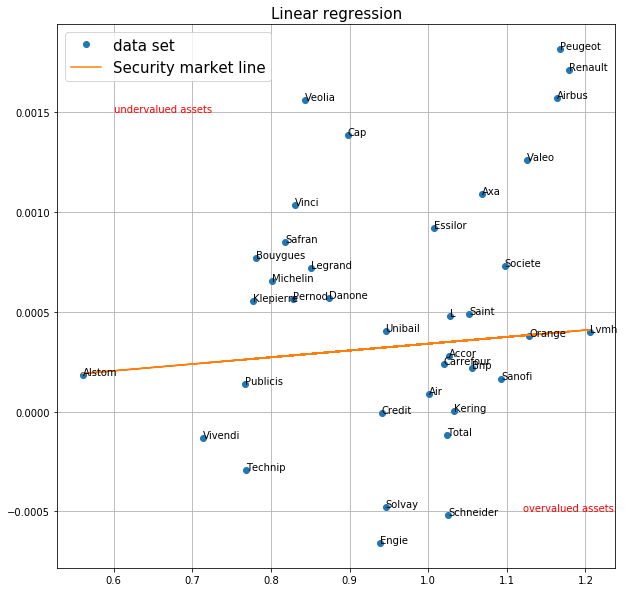

In [40]:
## Plot 
Res = Security_market_line(Data)
fig = plt.figure(figsize = (10,10))
plt.plot(Res['beta'],Res['Average.val'],marker='o',linestyle='',label='data set')
plt.plot(Res['beta'],Res['Fit.val'],label=r'Security market line')
size = Res.shape[0]
for index in range(size): ## write names of assets
    name = Res['Name'][index].split('.')[0]
    x = Res['beta'][index]
    y = Res['Average.val'][index]
    plt.annotate(name, (x,y))
plt.text(0.6,0.0015,"undervalued assets",fontsize=10,color='r')
plt.text(1.12,-0.0005,"overvalued assets",fontsize=10,color='r')
plt.legend(fontsize = 15)
plt.title('Linear regression',fontsize = 15)
plt.grid()
plt.show() 

<a id="LeastSquare"></a>
## Appendix


### Chebyshev Polynomials

<div  markdown=1 class="Prop"> For all $n \in \mathbb{N}$, the polynomial $T_n$ has the following properties

- It is a plynomial of degree $n$ and if $n\geq 1$ the leading coefficient is $2^{n-1}$.

- For all $\theta \in \mathbb{R},$

$$ T_n(\cos\theta) = \cos(n\theta) $$

- $T_n$ has its $n$ (distincts) roots in $]-1,1[$ given by

$$\hat{x}_k = \cos\left(\frac{2k + 1}{2n}\pi\right), \quad 0 \leq k \leq n-1.$$

- $T_n(x) = 2^{n-1}(x-\hat{x}_0)\cdots(x-\hat{x}_{n-1})$

- For $x\in ]-1,1[$, one has $-1 \leq T_n(x) \leq 1$. If we let $\hat{y}_k = \cos\left(\frac{k\pi}{n}\right)$ for $0\leq k \leq n$, we have

$$-1= \hat{y}_n < \hat{y}_{n-1} < \cdots < \hat{y}_0 = 1 $$

with

$$T_n\left(\hat{y}_k\right) = (-1)^{k}$$

** Leading coefficient** 

By recurrence first we see that $T_0$ is of degree $0$. Moreover, $T_1$ is of degree $1$ and has leading coefficient $2^{1-1} = 1$. Let us show the same result for $n>1$ by recurrence. We assume the result is true for all $k \leq n$. We use 
$$T_{n+1}(X) = 2XT_{n}(X) - T_{n-1}(X).$$
In this equation, the right hand side is the sum of a polynomial of degree $n+1$ and a polynomial of degree $n-1$. Thus, it is of degree $n+1$. Finally, the leading coefficient of $T_{n+1}$ is found by matching the leading coefficients in the two sides of the equality and using the hypothesis of reccurence. 

**Trigonometric identity**: 

we prove this by reccurence. 
$T_0 = 1 = \cos(0\theta)$. Let us assume the result is true for $k\leq n$, and show that it then holds for $k=n+1$. We write 
$$\cos((n+1)\theta)) + \cos((n-1)\theta)) = 2\cos(n\theta)\cos(\theta)$$
We conclude, using the recurrence hypothesis 
$$\cos((n+1)\theta) = 2\cos(\theta) T_n(\cos(\theta)) - T_{n-1}(\theta)$$
and the recursive definition of $T_n$: 
$$\cos((n+1)\theta) = T_{n+1}(\cos(\theta))$$

** Roots**

For $0 \leq k \leq n-1$, we have $0 < \frac{2k+1}{2n}\pi < \pi$. Let's call $\omega_k = \frac{(2k+1)\pi}{2n}$. Then we have $\hat{x}_k = \cos(\omega_k)$ and 

$$0 < \omega_0 < \omega_1 < \cdots < \omega_{n-1} < \pi.$$

Since the $\cos$ function is stricly decreasing on $]0,\pi[$, we deduce 

$$-1 < \hat{x}_{n-1} < \hat{x}_{n-2} < \cdots < \hat{x}_{0} < 1.$$

Therefore, $\hat{x}_k$ are $n$ distinct points in $]-1,1[$. To show that $T_n(\hat{x}_k) = 0$ for all $k$, we use the trigonometric property $T_n(\cos\theta) = \cos(n\theta)$:

$$T_n(\hat{x}_k) = \cos\left(n \frac{2k+1}{2n} \pi\right) = \cos\left(\frac{\pi}{2} + k\pi\right).$$

which vanishes for all $k$. 

** Expression of $T_n$ ** 

Since $T_n$ is of degree $n$, we have now identified all of its roots (the $(\hat{x}_k)_k$) so there exists a constant $C$ such that 

$$T_n(X) = C \left(X - \hat{x}_0\right) \left(X - \hat{x}_1\right)\cdots \left(X - \hat{x}_{n-1}\right).$$

$C$ is the dominant coefficient of $T_n$ so according to the previous, $C = 2^{n-1}$. 

**Extremal values**:

We can show

$$-1= \hat{y}_n < \hat{y}_{n-1} < \cdots < \hat{y}_0 = 1 $$

again using the fact that $\cos$ is a strictly decreasing function. 

Finally, $T_n(\hat{y}_k) =\left(\cos\left(\frac{k\pi}{n}\right)\right) = \cos\left(n\frac{k \pi}{n}\right) = \cos(k\pi) = (-1)^k$.

In [41]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()